# Ice Classification in the Groenland

# Fabio Marcaurelio & Davide Messina

# Project Machine Learning

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import statistics as stat
from datetime import datetime
import seaborn as sns

# 1 Context

In [4]:
Features = pd.read_csv(r"C:\\Users\\Utente\\notebooks\\Machine learning\\data_Features.csv")
Targets = pd.read_csv(r"C:\\Users\\Utente\\notebooks\\Machine learning\\data_Targets.csv")

In [5]:
Targets.rename( columns={'Unnamed: 0':'time'}, inplace=True )

In [6]:
print(Targets.isnull().sum())
print(Features.isnull().sum())

time    0
Y1      0
Y3      0
Y4      0
Y5      0
dtype: int64
time      0
t2m       0
u10       0
v10       0
SST       0
SIC       0
r1_MAR    0
r2_MAR    0
r3_MAR    0
r4_MAR    0
r5_MAR    0
dtype: int64


In [7]:
print(round(Targets.describe()),2)

           Y1      Y3      Y4      Y5
count  2556.0  2556.0  2556.0  2556.0
mean      4.0     1.0     4.0     1.0
std      19.0     5.0    26.0    10.0
min       0.0     0.0     0.0     0.0
25%       0.0     0.0     0.0     0.0
50%       0.0     0.0     0.0     0.0
75%       0.0     0.0     0.0     0.0
max     433.0   139.0   624.0   284.0 2


In [8]:
print(round(Features.describe()),2)

          t2m     u10     v10     SST     SIC  r1_MAR  r2_MAR  r3_MAR  r4_MAR  \
count  2556.0  2556.0  2556.0  2556.0  2556.0  2556.0  2556.0  2556.0  2556.0   
mean    -10.0     0.0     1.0    -1.0    73.0    19.0    12.0     1.0     4.0   
std      10.0     5.0     4.0     1.0    29.0    48.0    28.0     3.0    13.0   
min     -32.0   -14.0   -12.0    -2.0     0.0     0.0     0.0     0.0     0.0   
25%     -20.0    -4.0    -2.0    -2.0    70.0     0.0     0.0     0.0     0.0   
50%     -10.0    -0.0     1.0    -2.0    85.0     0.0     0.0     0.0     0.0   
75%       0.0     4.0     3.0    -0.0    90.0     4.0     4.0     0.0     0.0   
max       8.0    15.0    13.0     6.0   100.0   480.0   282.0    23.0   116.0   

       r5_MAR  
count  2556.0  
mean      5.0  
std      13.0  
min       0.0  
25%       0.0  
50%       0.0  
75%       0.0  
max      88.0   2


Variables Distribution

Text(0, 0.5, 'r5_MAR')

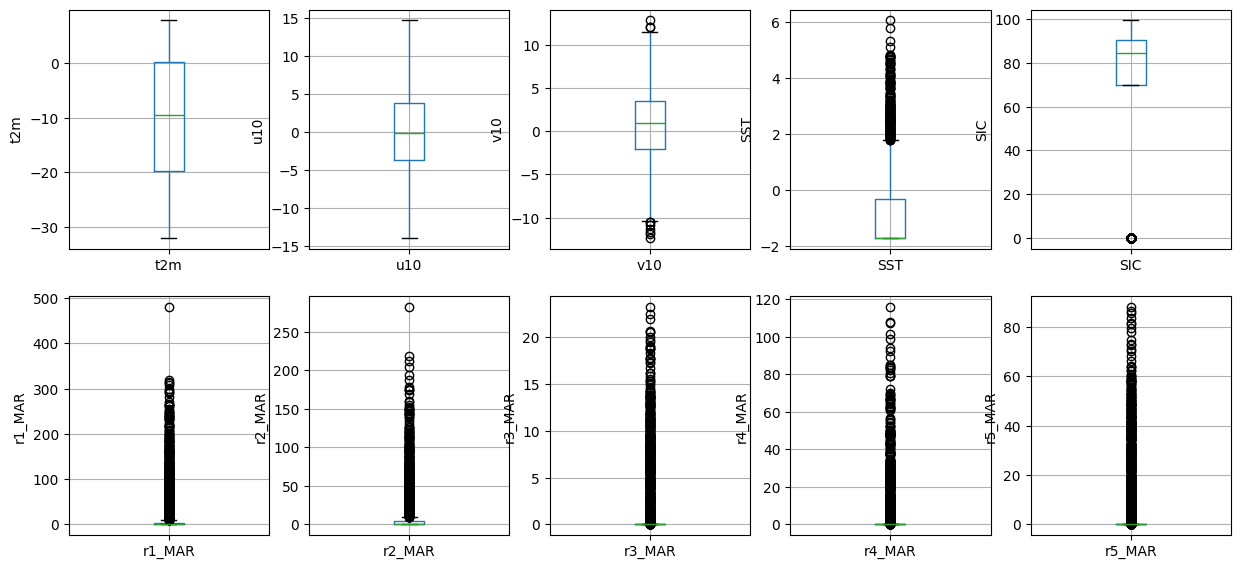

In [9]:
plt.figure(figsize=(15,18))

plt.subplot(5, 5, 1)
fig = Features.boxplot(column='t2m')
fig.set_title('')
fig.set_ylabel('t2m')

plt.subplot(5, 5, 2)
fig = Features.boxplot(column='u10')
fig.set_title('')
fig.set_ylabel('u10')

plt.subplot(5, 5, 3)
fig = Features.boxplot(column='v10')
fig.set_title('')
fig.set_ylabel('v10')

plt.subplot(5, 5, 4)
fig = Features.boxplot(column='SST')
fig.set_title('')
fig.set_ylabel('SST')

plt.subplot(5, 5, 5)
fig = Features.boxplot(column='SIC')
fig.set_title('')
fig.set_ylabel('SIC')

plt.subplot(5, 5, 6)
fig = Features.boxplot(column='r1_MAR')
fig.set_title('')
fig.set_ylabel('r1_MAR')

plt.subplot(5, 5, 7)
fig = Features.boxplot(column='r2_MAR')
fig.set_title('')
fig.set_ylabel('r2_MAR')

plt.subplot(5, 5, 8)
fig = Features.boxplot(column='r3_MAR')
fig.set_title('')
fig.set_ylabel('r3_MAR')

plt.subplot(5, 5, 9)
fig = Features.boxplot(column='r4_MAR')
fig.set_title('')
fig.set_ylabel('r4_MAR')

plt.subplot(5, 5, 10)
fig = Features.boxplot(column='r5_MAR')
fig.set_title('')
fig.set_ylabel('r5_MAR')

Text(0, 0.5, '')

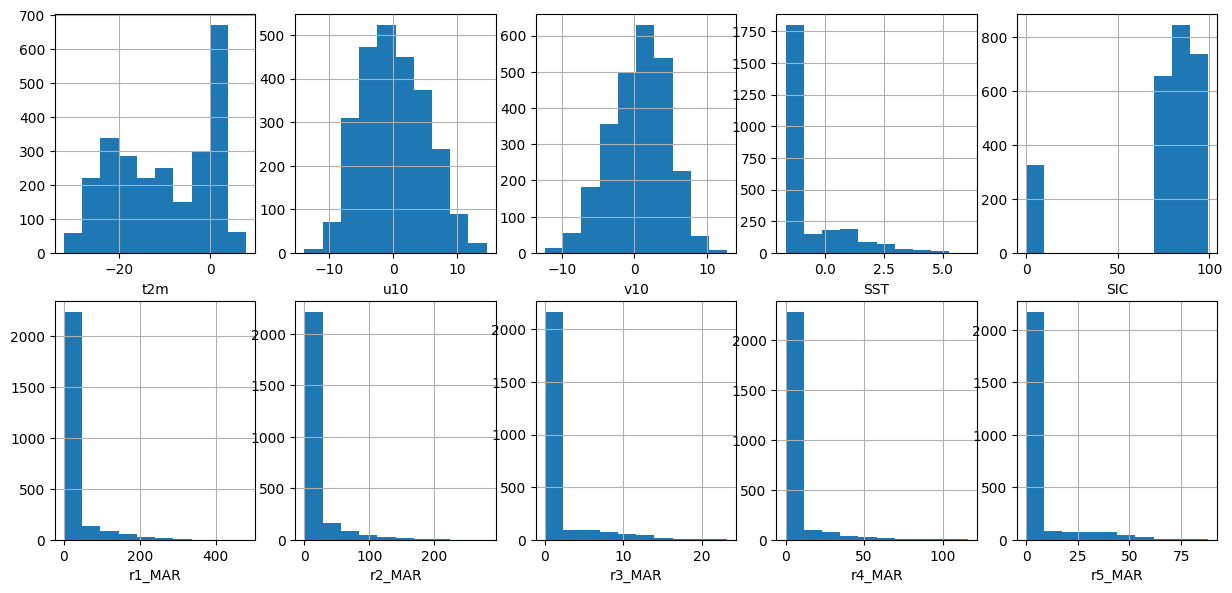

In [10]:
plt.figure(figsize=(15,18))

plt.subplot(5, 5, 1)
fig = Features.t2m.hist(bins=10)
fig.set_xlabel('t2m')
fig.set_ylabel('')

plt.subplot(5, 5, 2)
fig = Features.u10.hist(bins=10)
fig.set_xlabel('u10')
fig.set_ylabel('')

plt.subplot(5, 5, 3)
fig = Features.v10.hist(bins=10)
fig.set_xlabel('v10')
fig.set_ylabel('')

plt.subplot(5, 5, 4)
fig = Features.SST.hist(bins=10)
fig.set_xlabel('SST')
fig.set_ylabel('')

plt.subplot(5, 5, 5)
fig = Features.SIC.hist(bins=10)
fig.set_xlabel('SIC')
fig.set_ylabel('')

plt.subplot(5, 5, 6)
fig = Features.r1_MAR.hist(bins=10)
fig.set_xlabel('r1_MAR')
fig.set_ylabel('')

plt.subplot(5, 5, 7)
fig = Features.r2_MAR.hist(bins=10)
fig.set_xlabel('r2_MAR')
fig.set_ylabel('')

plt.subplot(5, 5, 8)
fig = Features.r3_MAR.hist(bins=10)
fig.set_xlabel('r3_MAR')
fig.set_ylabel('')

plt.subplot(5, 5, 9)
fig = Features.r4_MAR.hist(bins=10)
fig.set_xlabel('r4_MAR')
fig.set_ylabel('')

plt.subplot(5, 5, 10)
fig = Features.r5_MAR.hist(bins=10)
fig.set_xlabel('r5_MAR')
fig.set_ylabel('')

Targets: Infrasound Signals

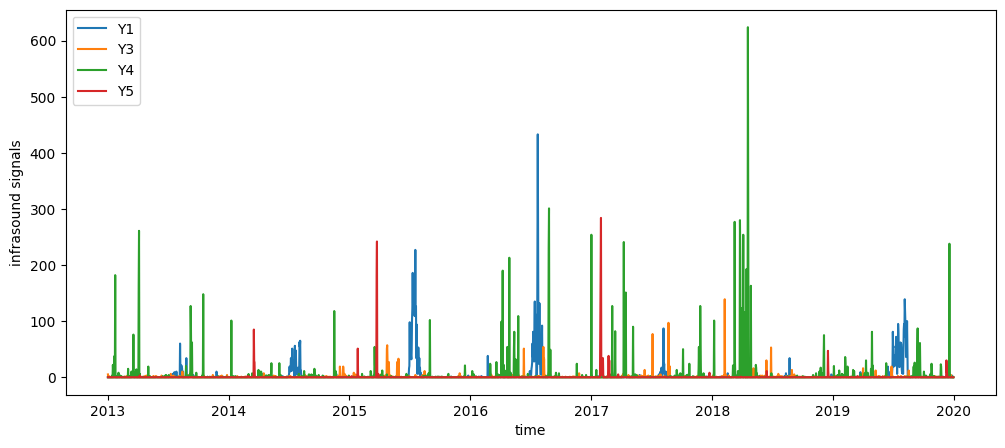

In [11]:
Targets["time"] = pd.to_datetime(Targets["time"])

fig, ax = plt.subplots(figsize=(12, 5))
ax.plot(Targets['time'], Targets['Y1'],label="Y1")
ax.plot(Targets['time'], Targets['Y3'],label="Y3")
ax.plot(Targets['time'], Targets['Y4'],label="Y4")
ax.plot(Targets['time'], Targets['Y5'],label="Y5")
ax.set_xlabel("time")
ax.set_ylabel("infrasound signals")
plt.legend(loc="upper left")

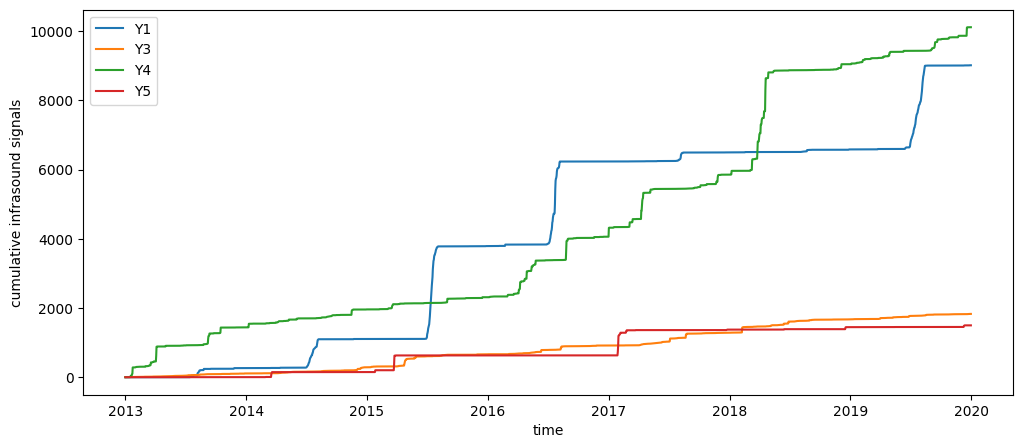

In [12]:
Targets["time"] = pd.to_datetime(Targets["time"])

fig, ax = plt.subplots(figsize=(12, 5))

ax.plot(Targets['time'],Targets['Y1'].cumsum(),label="Y1")
ax.plot(Targets['time'],Targets['Y3'].cumsum(),label="Y3")
ax.plot(Targets['time'],Targets['Y4'].cumsum(),label="Y4")
ax.plot(Targets['time'],Targets['Y5'].cumsum(),label="Y5")
ax.set_xlabel("time")
ax.set_ylabel("cumulative infrasound signals")
plt.legend(loc="upper left")

Features: 2 meter below sea temperature

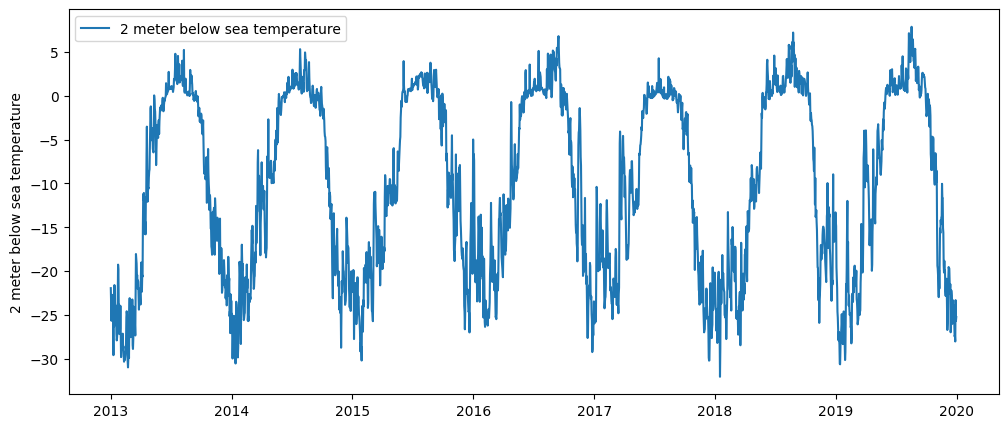

In [13]:
Features["time"] = pd.to_datetime(Features["time"])

fig, ax = plt.subplots(figsize=(12, 5))

ax.plot(Features['time'], Features['t2m'],label="2 meter below sea temperature")
ax.set_ylabel("2 meter below sea temperature")
plt.legend(loc="upper left")

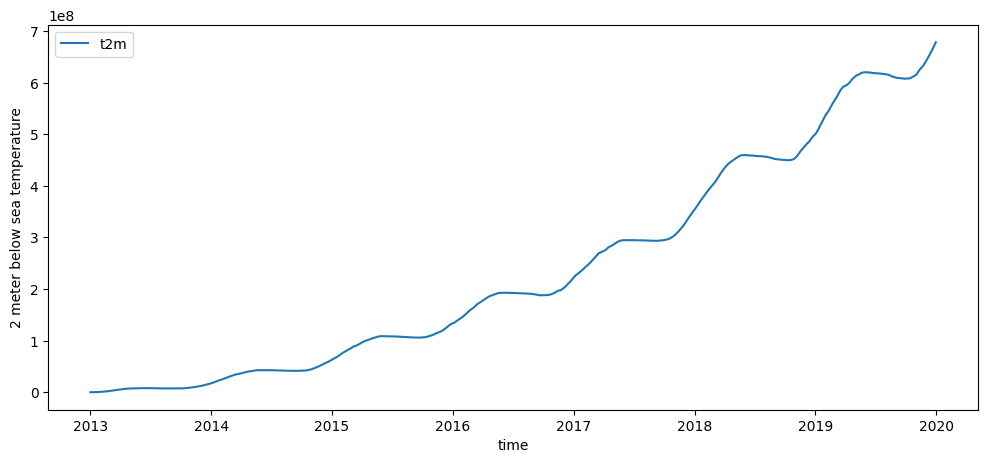

In [14]:
Targets["time"] = pd.to_datetime(Targets["time"])

fig, ax = plt.subplots(figsize=(12, 5))

ax.plot(Targets['time'],Features['t2m'].cumsum()**2,label="t2m")

ax.set_xlabel("time")
ax.set_ylabel("2 meter below sea temperature")
plt.legend(loc="upper left")

Features: Sea-surface temperature

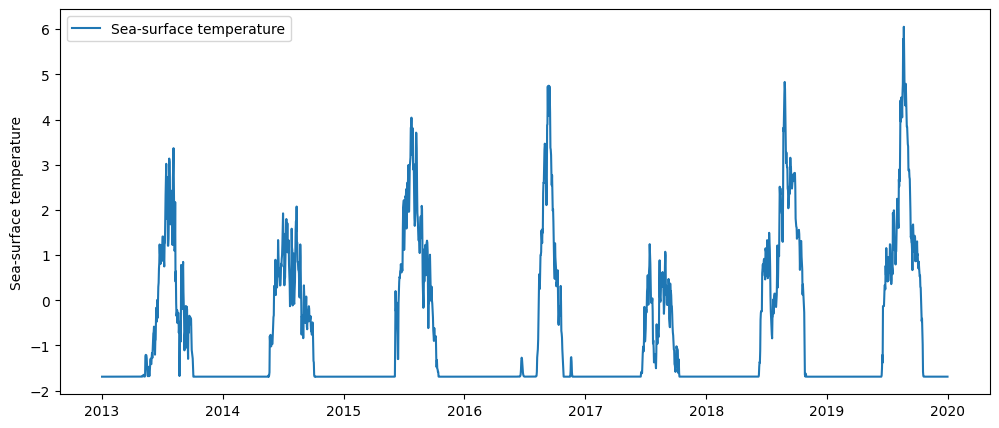

In [15]:
Features["time"] = pd.to_datetime(Features["time"])

fig, ax = plt.subplots(figsize=(12, 5))

ax.plot(Features['time'], Features['SST'],label="Sea-surface temperature")
ax.set_ylabel("Sea-surface temperature")
plt.legend(loc="upper left")

Features: Wind speed

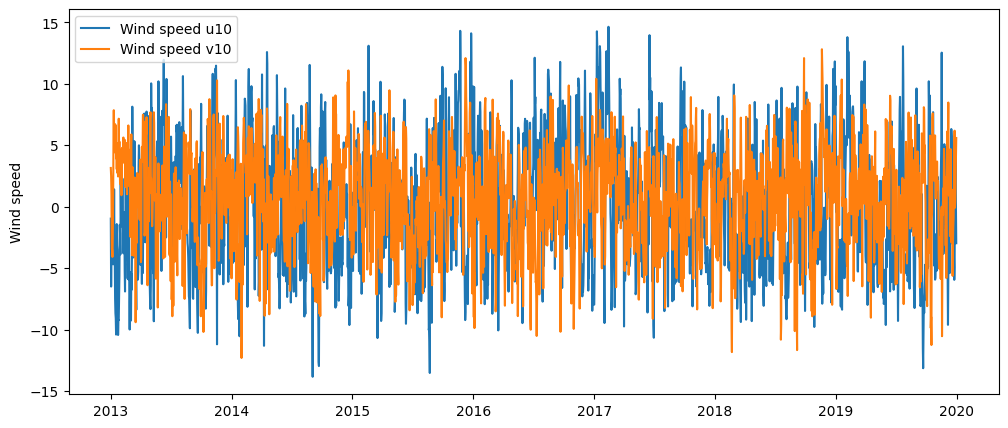

In [16]:
Features["time"] = pd.to_datetime(Features["time"])

fig, ax = plt.subplots(figsize=(12, 5))

ax.plot(Features['time'], Features['u10'],label="Wind speed u10")
ax.plot(Features['time'], Features['v10'],label="Wind speed v10")
ax.set_ylabel("Wind speed")
plt.legend(loc="upper left")

Features: Sea Ice Concentration information

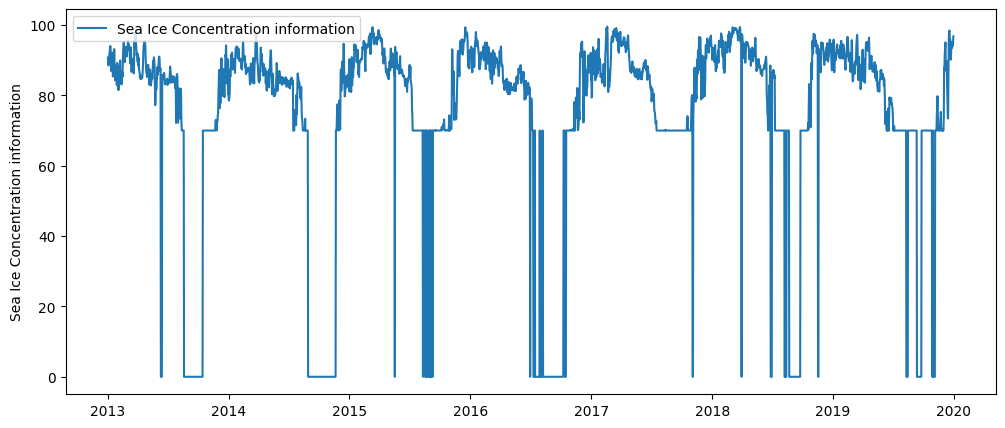

In [17]:
Features["time"] = pd.to_datetime(Features["time"])

fig, ax = plt.subplots(figsize=(12, 5))

ax.plot(Features['time'], Features['SIC'],label="Sea Ice Concentration information")
ax.set_ylabel("Sea Ice Concentration information")
plt.legend(loc="upper left")

Features: Groenland liquid water discharge

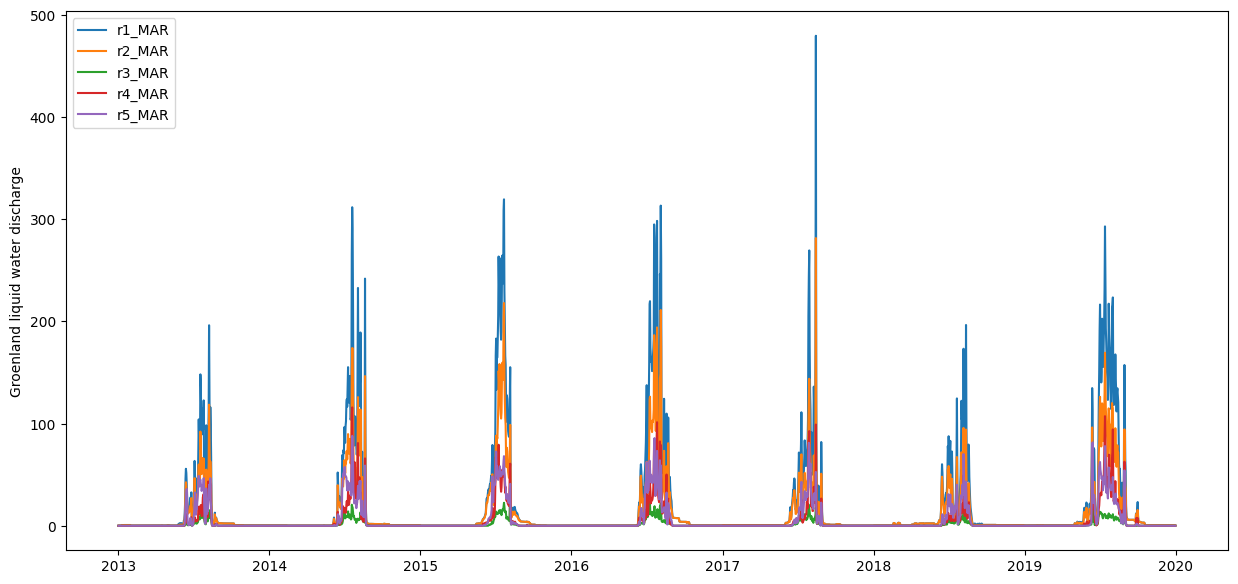

In [18]:
Features["time"] = pd.to_datetime(Features["time"])

fig, ax = plt.subplots(figsize=(15, 7))

ax.plot(Features['time'], Features['r1_MAR'],label="r1_MAR")
ax.plot(Features['time'], Features['r2_MAR'],label="r2_MAR")
ax.plot(Features['time'], Features['r3_MAR'],label="r3_MAR")
ax.plot(Features['time'], Features['r4_MAR'],label="r4_MAR")
ax.plot(Features['time'], Features['r5_MAR'],label="r5_MAR")
ax.set_ylabel("Groenland liquid water discharge")
plt.legend(loc="upper left")

Correlation Matrix

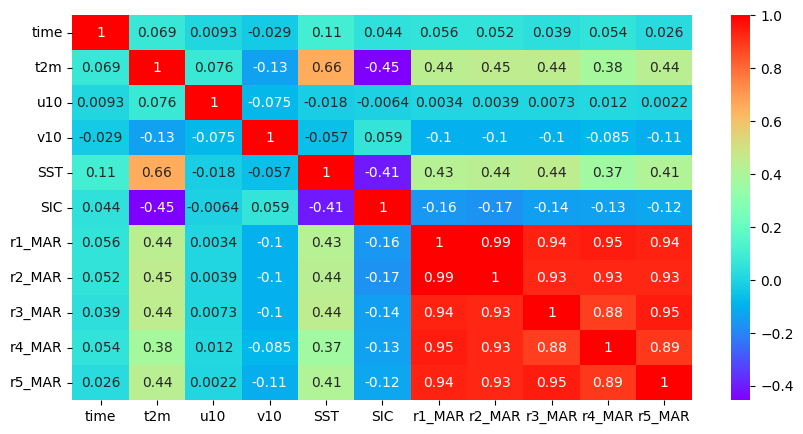

In [19]:
plt.figure(figsize = (10,5))
sns.heatmap(Features.corr(), annot = True, cmap="rainbow")
plt.show()

# 2 Transform the target variable into a binary

If Y1 assumes values greather than 0 then 1

In [20]:
print('The median of Y1 is:',Targets['Y1'].median())

The median of Y1 is: 0.0


In [21]:
Targets['Y1d'] = (Targets.Y1 > 0).astype('int')
print(Targets)

           time  Y1  Y3  Y4  Y5  Y1d
0    2013-01-01   0   5   0   0    0
1    2013-01-02   0   0   0   0    0
2    2013-01-03   0   0   0   0    0
3    2013-01-04   0   2   0   0    0
4    2013-01-05   0   0   0   0    0
...         ...  ..  ..  ..  ..  ...
2551 2019-12-27   3   0   1   0    1
2552 2019-12-28   0   0   0   0    0
2553 2019-12-29   0   0   0   0    0
2554 2019-12-30   0   0   1   0    0
2555 2019-12-31   0   0   0   0    0

[2556 rows x 6 columns]


In [22]:
Targets['Y1d'].value_counts()

Y1d
0    2262
1     294
Name: count, dtype: int64

# 3 machine learning classifiers

In [23]:
dfT = Targets.drop('time', axis=1) 
dfF = Features.drop('time', axis=1)

In [24]:
X = dfF
y = dfT['Y1d']
y.value_counts()

Y1d
0    2262
1     294
Name: count, dtype: int64

Divide the Sample in train and test with 75% train and 25% test

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=0.25, random_state=0)

# 3.1 Logistic Regression

In [27]:
from sklearn.linear_model import LogisticRegression

Fit the Model

In [28]:
logreg = LogisticRegression(random_state=16, max_iter=1000)
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

Evaluate possible overfitting 

In [29]:
print('Training set score: {:.4f}'.format(logreg.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(logreg.score(X_test, y_test)))

Training set score: 0.9457
Test set score: 0.9343


Confusion Matrix

In [30]:
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(cnf_matrix)

[[544  12]
 [ 30  53]]


Classification report

In [31]:
from sklearn.metrics import classification_report
target_names = ['Y1=0', 'Y1>0']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

        Y1=0       0.95      0.98      0.96       556
        Y1>0       0.82      0.64      0.72        83

    accuracy                           0.93       639
   macro avg       0.88      0.81      0.84       639
weighted avg       0.93      0.93      0.93       639



Area Under the Curve (AUC)

In [32]:
y_pred_proba = logreg.predict_proba(X_test)[::,1]
auc = metrics.roc_auc_score(y_test, y_pred_proba )
print('Area Under the Curve (AUC): {:.4f}'.format(auc))

Area Under the Curve (AUC): 0.8926


Precision-Recall Curve

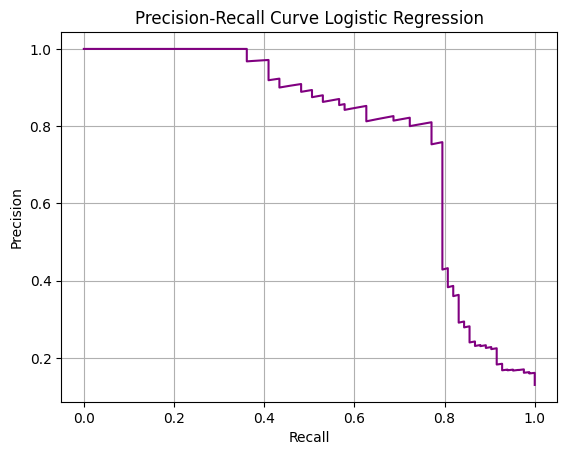

In [33]:
from sklearn.metrics import precision_recall_curve

precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)

fig, ax = plt.subplots()
ax.plot(recall, precision, color='purple')

ax.set_title('Precision-Recall Curve Logistic Regression')
ax.set_ylabel('Precision')
ax.set_xlabel('Recall')
plt.grid()

plt.show()

# 3.2 Decision Tree Classifier

In [34]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

Fit the Model

In [35]:
treefit = tree.DecisionTreeClassifier()
treefit = treefit.fit(X_train, y_train)
y_pred1=treefit.predict(X_test)

Evaluate possible overfitting 

In [36]:
print('Training set score: {:.4f}'.format(treefit.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(treefit.score(X_test, y_test)))

Training set score: 1.0000
Test set score: 0.9092


Confusion Matrix

In [37]:
cnf_matrix1 = metrics.confusion_matrix(y_test, y_pred1)
print(cnf_matrix1)

[[526  30]
 [ 28  55]]


Classification report

In [38]:
target_names = ['Y1=0', 'Y1>0']
print(classification_report(y_test, y_pred1, target_names=target_names))

              precision    recall  f1-score   support

        Y1=0       0.95      0.95      0.95       556
        Y1>0       0.65      0.66      0.65        83

    accuracy                           0.91       639
   macro avg       0.80      0.80      0.80       639
weighted avg       0.91      0.91      0.91       639



Area Under the Curve (AUC)

In [39]:
y_pred_proba1 = treefit.predict_proba(X_test)[::,1]
auc1 = metrics.roc_auc_score(y_test, y_pred_proba1)
print('Area Under the Curve (AUC): {:.4f}'.format(auc1))

Area Under the Curve (AUC): 0.8043


Precision-Recal Curve

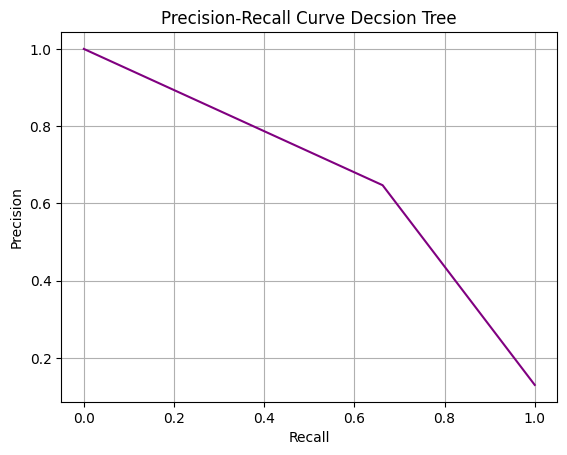

In [40]:
from sklearn.metrics import precision_recall_curve

precision1, recall1, thresholds1 = precision_recall_curve(y_test, y_pred_proba1)

fig, ax = plt.subplots()
ax.plot(recall1, precision1, color='purple')

ax.set_title('Precision-Recall Curve Decsion Tree')
ax.set_ylabel('Precision')
ax.set_xlabel('Recall')
plt.grid()

plt.show()

In [41]:
from io import StringIO
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.tree import export_graphviz 
from IPython.display import Image  
import pydotplus

In [42]:
feature_names=['t2m','u10','v10','SST','SIC','r1_MAR','r2_MAR','r3_MAR','r4_MAR','r5_MAR']

Complexity of the Model

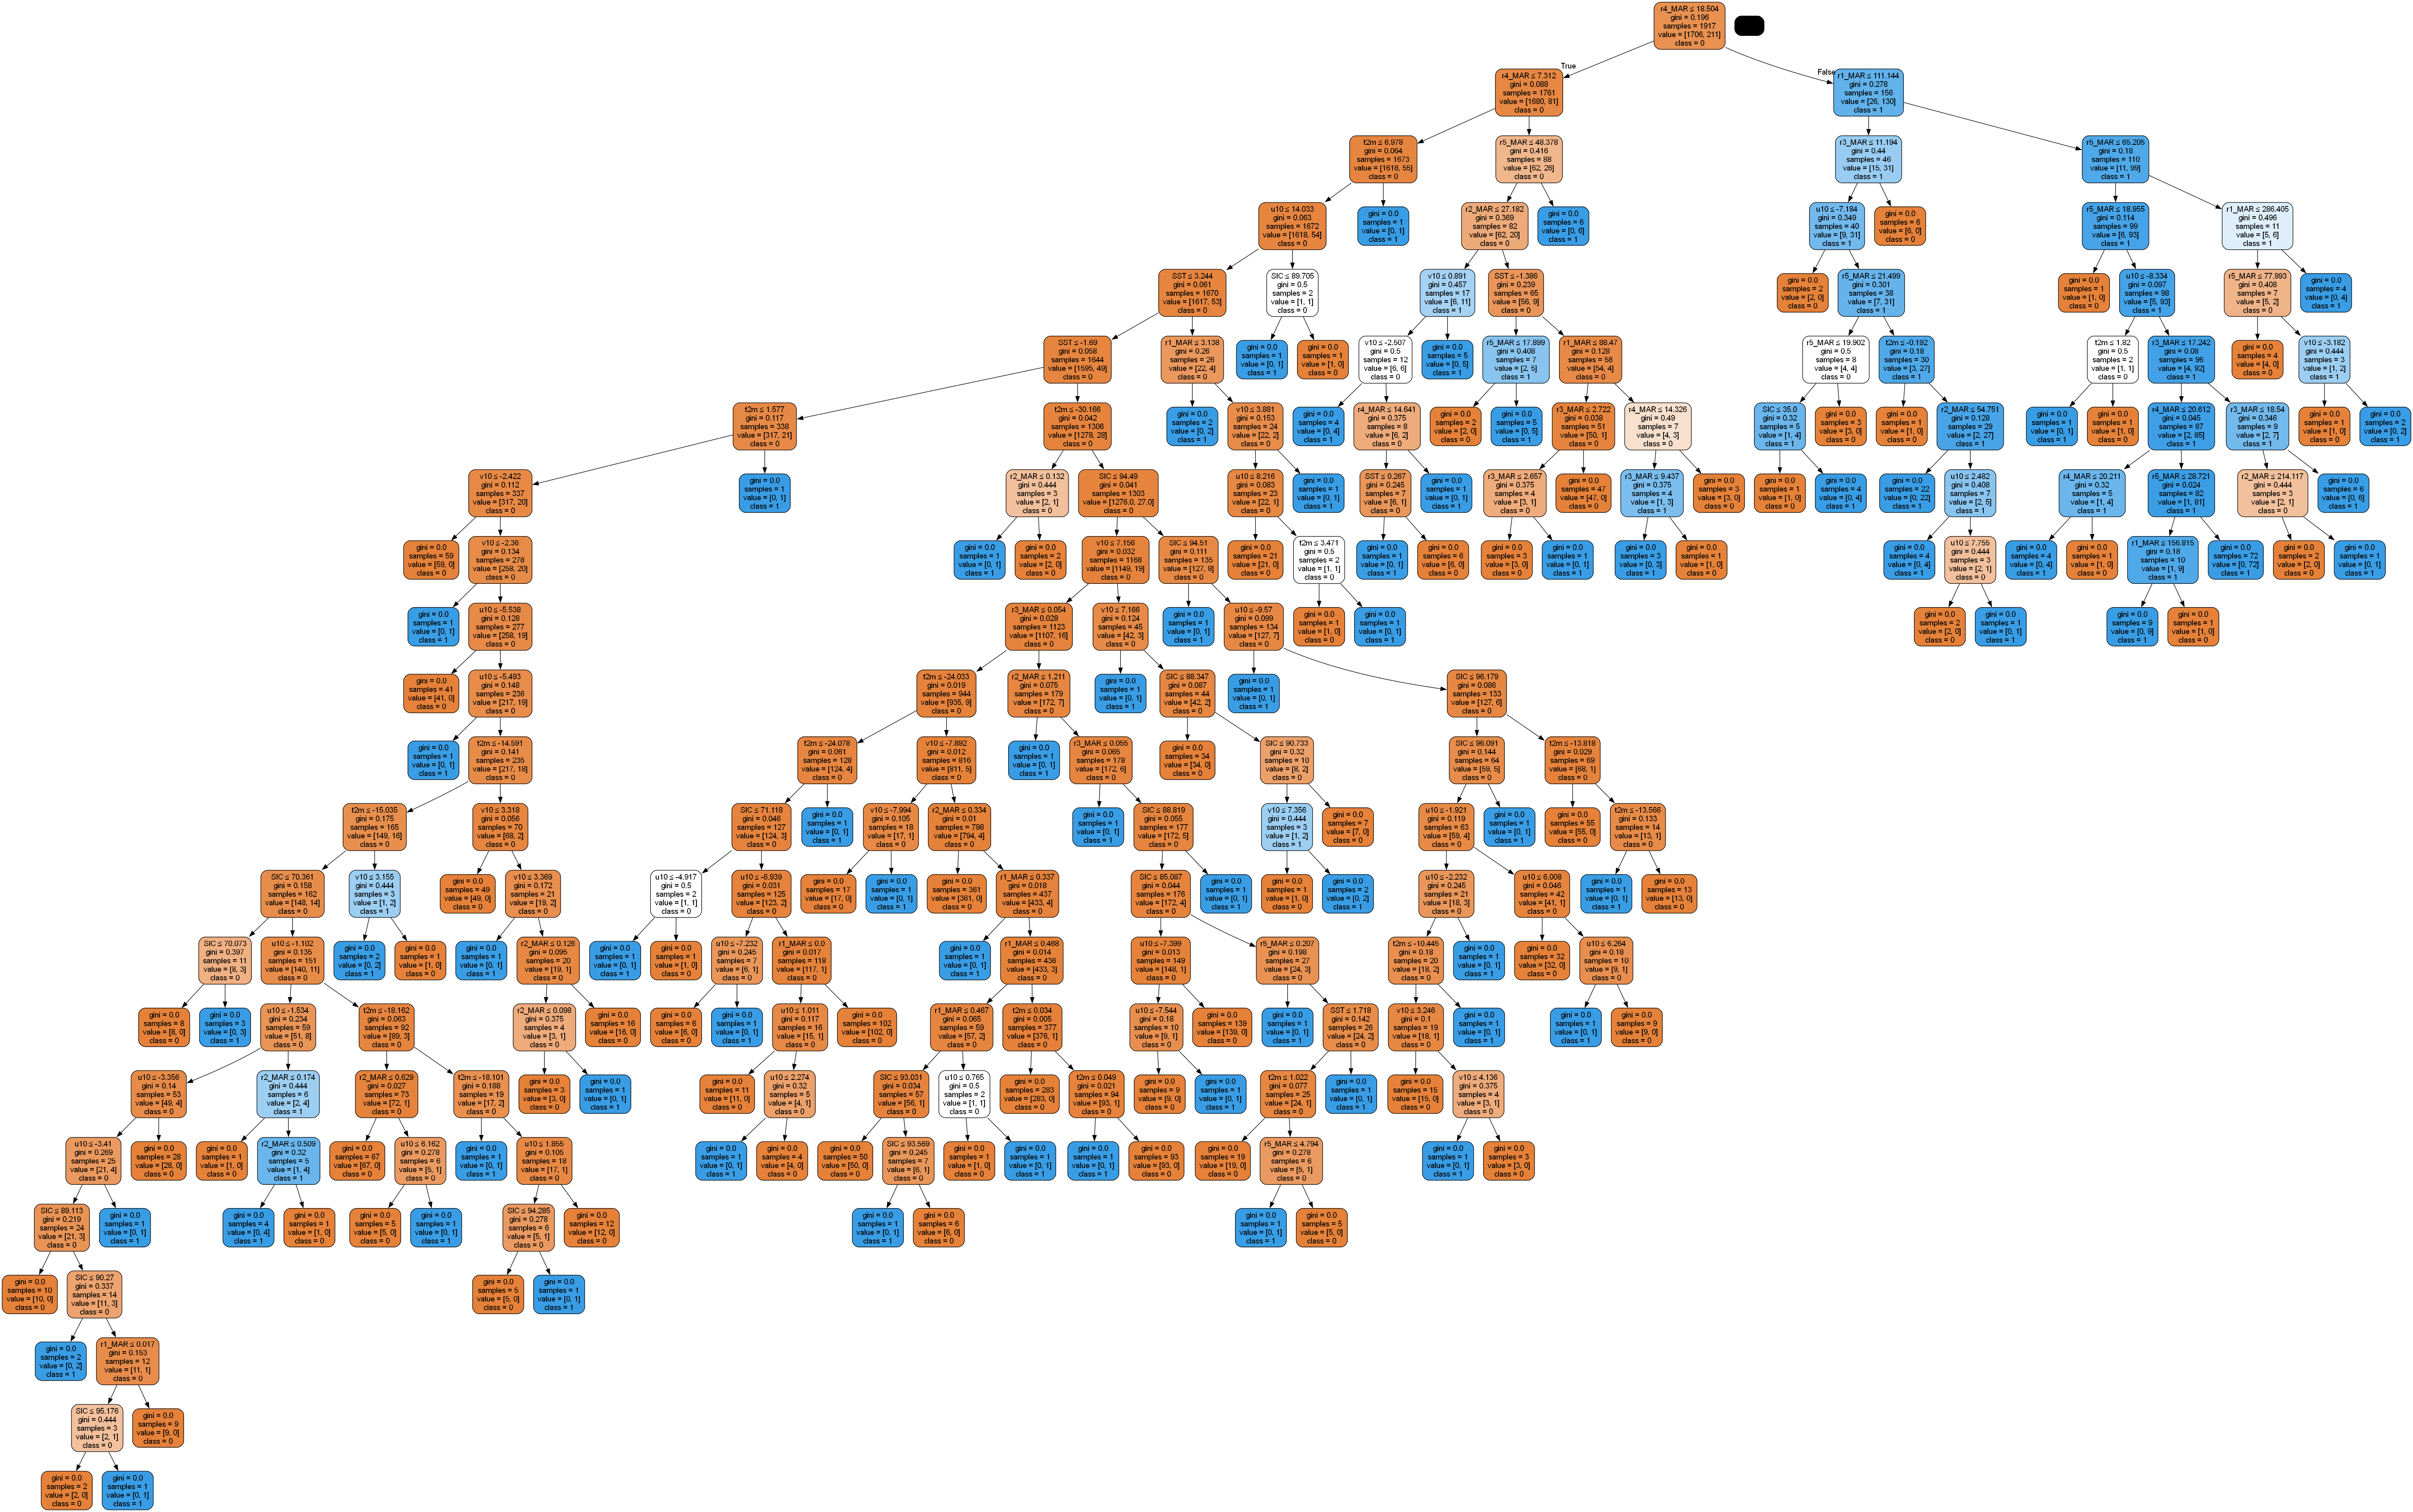

In [43]:
dot_data = StringIO()
export_graphviz(treefit, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_names,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('tree.png')
Image(graph.create_png())

Feauteres Importance

In [44]:
dfFeatures = pd.DataFrame({'Features':feature_names,'Importances':treefit.feature_importances_})
dfFeatures.sort_values(by='Importances',ascending=False).head(10)

,Features,Importances
8,r4_MAR,0.517492
1,u10,0.085823
4,SIC,0.069752
9,r5_MAR,0.062664
2,v10,0.054932
0,t2m,0.053891
6,r2_MAR,0.045980
5,r1_MAR,0.043802
7,r3_MAR,0.038063
3,SST,0.027601


Finetuning

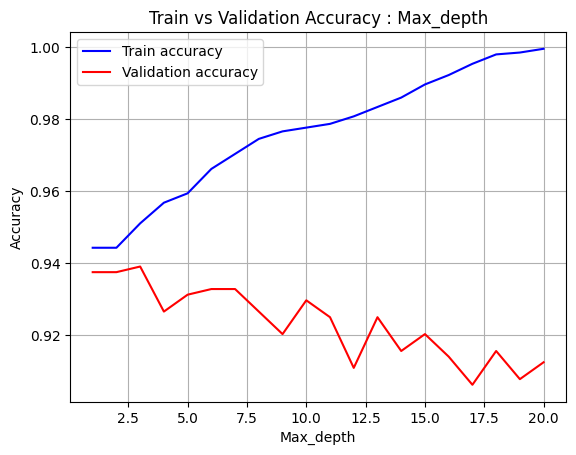

In [45]:
train_acc1 = []
val_acc1 = []

for max_d in range(1,21):
  model = DecisionTreeClassifier(max_depth=max_d, random_state=42)
  model.fit(X_train, y_train)
  train_acc1.append(model.score(X_train, y_train))
  val_acc1.append(model.score(X_test,y_test))

line1, = plt.plot([*range(1,21)], train_acc1, 'b', label='Train accuracy')
line2, = plt.plot([*range(1,21)], val_acc1, 'r', label='Validation accuracy')

plt.legend()
plt.title('Train vs Validation Accuracy : Max_depth')
plt.ylabel('Accuracy')
plt.xlabel('Max_depth')
plt.grid()
plt.show()

train_acc1.clear()
val_acc1.clear()

# 3.3 Decision Tree Classifier (Finetuning)

In [46]:
from sklearn.tree import DecisionTreeClassifier

Fit the Model

In [47]:
treefit1 = DecisionTreeClassifier(criterion="gini",max_depth=3)
treefit1 = treefit1.fit(X_train,y_train)
y_pred11 = treefit1.predict(X_test)

Evaluate possible overfitting 

In [48]:
print('Training set score: {:.4f}'.format(treefit1.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(treefit1.score(X_test, y_test)))

Training set score: 0.9510
Test set score: 0.9390


Confusion Matrix

In [49]:
cnf_matrix11 = metrics.confusion_matrix(y_test, y_pred11)
print(cnf_matrix11)

[[546  10]
 [ 29  54]]


Classification Matrix

In [50]:
target_names = ['Y1=0', 'Y1>0']
print(classification_report(y_test, y_pred11, target_names=target_names))

              precision    recall  f1-score   support

        Y1=0       0.95      0.98      0.97       556
        Y1>0       0.84      0.65      0.73        83

    accuracy                           0.94       639
   macro avg       0.90      0.82      0.85       639
weighted avg       0.94      0.94      0.94       639



Area Under the Curve (AUC)

In [51]:
y_pred_proba2 = treefit1.predict_proba(X_test)[::,1]
auc2 = metrics.roc_auc_score(y_test, y_pred_proba2)
print('Area Under the Curve (AUC): {:.4f}'.format(auc2))

Area Under the Curve (AUC): 0.8779


Precision-Recall Curve

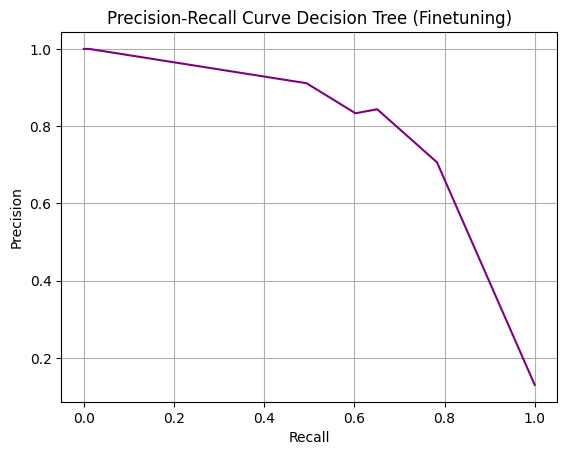

In [52]:
from sklearn.metrics import precision_recall_curve

precision3, recall3, thresholds3 = precision_recall_curve(y_test, y_pred_proba2)

fig, ax = plt.subplots()
ax.plot(recall3, precision3, color='purple')

ax.set_title('Precision-Recall Curve Decision Tree (Finetuning)')
ax.set_ylabel('Precision')
ax.set_xlabel('Recall')

plt.grid()
plt.show()

In [53]:
from six import StringIO 
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
import graphviz
import os

In [54]:
feature_names=['t2m','u10','v10','SST','SIC','r1_MAR','r2_MAR','r3_MAR','r4_MAR','r5_MAR']

Complexity of the Model

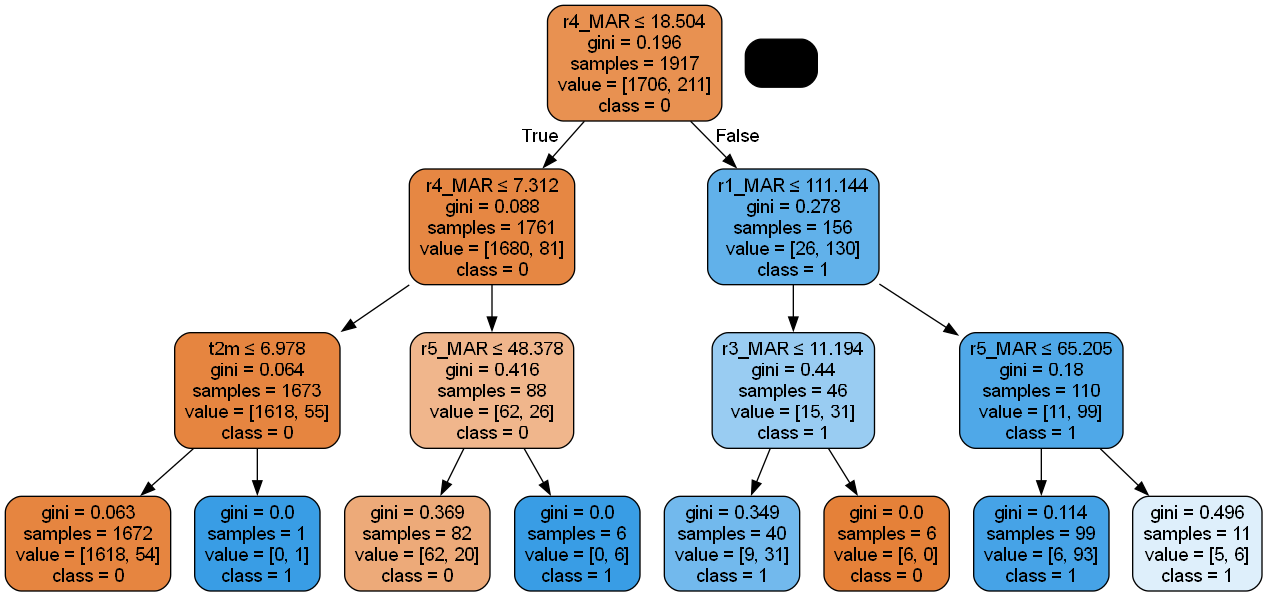

In [55]:
dot_data = StringIO()
export_graphviz(treefit1, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names = feature_names,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('tree1.png')
Image(graph.create_png())

Feauteres Importance

In [56]:
dfFeatures1 = pd.DataFrame({'Features':feature_names,'Importances':treefit1.feature_importances_})
dfFeatures1.sort_values(by='Importances',ascending=False).head(10)

,Features,Importances
8,r4_MAR,0.900436
9,r5_MAR,0.045047
7,r3_MAR,0.029828
5,r1_MAR,0.015781
0,t2m,0.008908
1,u10,0.000000
2,v10,0.000000
3,SST,0.000000
4,SIC,0.000000
6,r2_MAR,0.000000


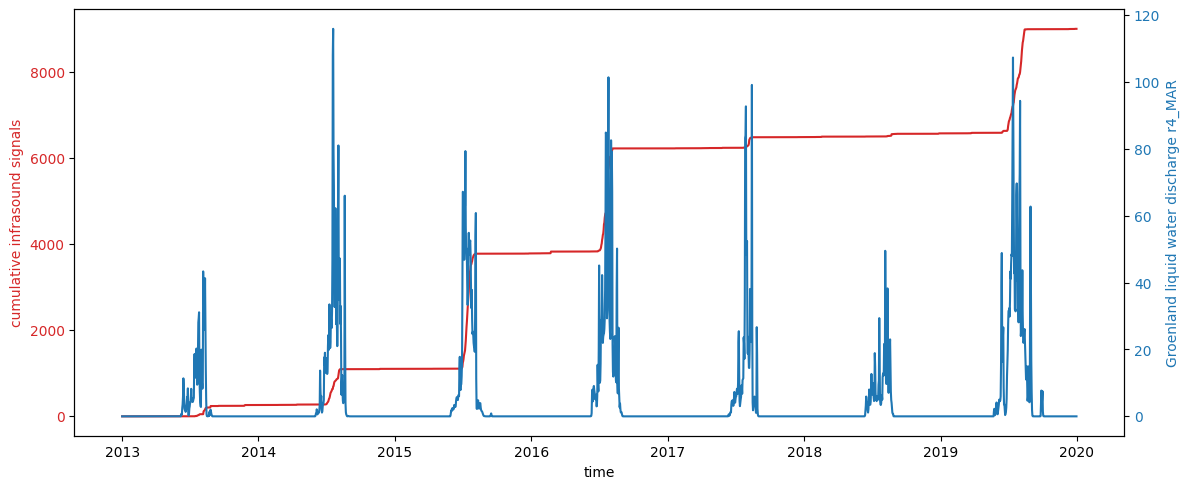

In [57]:
fig, ax1 = plt.subplots(figsize=(12, 5))

color = 'tab:red'
ax1.set_xlabel('time')
ax1.set_ylabel('cumulative infrasound signals', color=color)
ax1.plot(Targets['time'], Targets['Y1'].cumsum(), label="Y1", color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  

color = 'tab:blue'
ax2.set_ylabel('Groenland liquid water discharge r4_MAR', color=color)  
ax2.plot(Features['time'], Features['r4_MAR'], label="r4_MAR",color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  
plt.show()

# 3.4 Decsion Tree Classifier (Bagging)

In [58]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.ensemble import BaggingClassifier
from imblearn.ensemble import BalancedBaggingClassifier

Fit the Model

In [59]:
treebag = DecisionTreeClassifier()
bagging1 = BalancedBaggingClassifier(estimator=treebag,n_estimators=500, sampling_strategy='not majority',replacement=False, random_state=42)
bagging1.fit(X_train, y_train)
y_pred4 = bagging1.predict(X_test)

Evaluate possible overfitting 

In [60]:
print('Training set score: {:.4f}'.format(bagging1.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(bagging1.score(X_test, y_test)))

Training set score: 1.0000
Test set score: 0.9390


Confusion Matrix

In [61]:
cnf_matrix4 = metrics.confusion_matrix(y_test, y_pred4)
print(cnf_matrix4)

[[544  12]
 [ 27  56]]


Classification Report

In [62]:
target_names = ['Y1=0', 'Y1>0']
print(classification_report(y_test, y_pred4, target_names=target_names))

              precision    recall  f1-score   support

        Y1=0       0.95      0.98      0.97       556
        Y1>0       0.82      0.67      0.74        83

    accuracy                           0.94       639
   macro avg       0.89      0.83      0.85       639
weighted avg       0.94      0.94      0.94       639



Area Under the Curve (AUC)

In [63]:
y_pred_proba5 = bagging1.predict_proba(X_test)[::,1]
auc3 = metrics.roc_auc_score(y_test, y_pred_proba5)
print('Area Under the Curve (AUC): {:.4f}'.format(auc3))

Area Under the Curve (AUC): 0.8932


Precision-Recall Curve

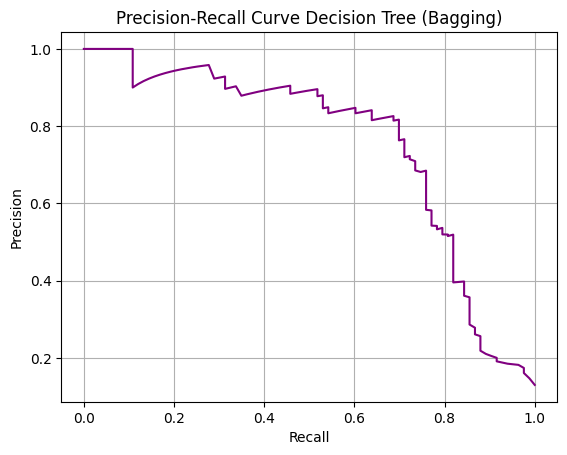

In [64]:
from sklearn.metrics import precision_recall_curve

precision4, recall4, thresholds4 = precision_recall_curve(y_test, y_pred_proba5)

fig, ax = plt.subplots()
ax.plot(recall4, precision4, color='purple')

ax.set_title('Precision-Recall Curve Decision Tree (Bagging)')
ax.set_ylabel('Precision')
ax.set_xlabel('Recall')

plt.grid()
plt.show()

# 3.5 Random forest

In [65]:
from sklearn.ensemble import RandomForestClassifier

Fit the Model

In [66]:
randfor = RandomForestClassifier(random_state=42, max_depth=3, n_estimators=500)
randfor = randfor.fit(X_train,y_train)
y_pred2 = randfor.predict(X_test)

Evaluate possible overfitting

In [67]:
print('Training set score: {:.4f}'.format(randfor.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(randfor.score(X_test, y_test)))

Training set score: 0.9489
Test set score: 0.9358


Confusion Matrix

In [68]:
cnf_matrix2 = metrics.confusion_matrix(y_test, y_pred2)
print(cnf_matrix2)

[[544  12]
 [ 29  54]]


Classification Report

In [69]:
target_names = ['Y1=0', 'Y1>0']
print(classification_report(y_test, y_pred2, target_names=target_names))

              precision    recall  f1-score   support

        Y1=0       0.95      0.98      0.96       556
        Y1>0       0.82      0.65      0.72        83

    accuracy                           0.94       639
   macro avg       0.88      0.81      0.84       639
weighted avg       0.93      0.94      0.93       639



Area Under the Curve (AUC)

In [70]:
y_pred_proba3 = randfor.predict_proba(X_test)[::,1]
auc4 = metrics.roc_auc_score(y_test, y_pred_proba3)
print('Area Under the Curve (AUC): {:.4f}'.format(auc4))

Area Under the Curve (AUC): 0.8876


Precision-Recall Curve

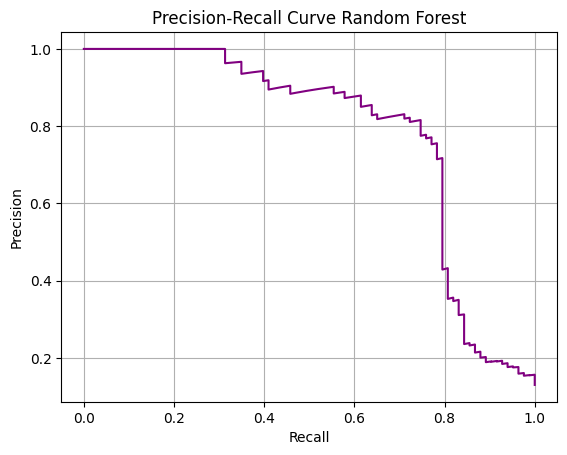

In [71]:
from sklearn.metrics import precision_recall_curve

precision5, recall5, thresholds5 = precision_recall_curve(y_test, y_pred_proba3)

fig, ax = plt.subplots()
ax.plot(recall5, precision5, color='purple')

ax.set_title('Precision-Recall Curve Random Forest')
ax.set_ylabel('Precision')
ax.set_xlabel('Recall')
plt.grid()

plt.show()

Complexity of the Model

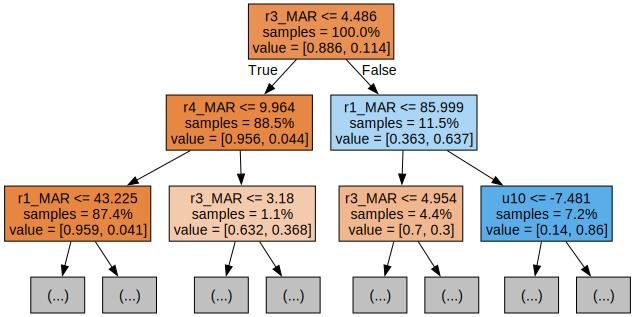

In [72]:
for i in range(1):
    tree = randfor.estimators_[i]
    dot_data = export_graphviz(tree,
                               feature_names=feature_names,  
                               filled=True,  
                               max_depth=2, 
                               impurity=False, 
                               proportion=True)
    graph = graphviz.Source(dot_data)
    display(graph)

Feauteres Importance

In [73]:
dfFeatures2 = pd.DataFrame({'Features':feature_names,'Importances':randfor.feature_importances_})
dfFeatures2.sort_values(by='Importances',ascending=False).head(10)

,Features,Importances
8,r4_MAR,0.305970
5,r1_MAR,0.244581
9,r5_MAR,0.192440
6,r2_MAR,0.108184
7,r3_MAR,0.080574
0,t2m,0.030115
3,SST,0.016749
1,u10,0.008771
2,v10,0.008555
4,SIC,0.004059


Finetuning

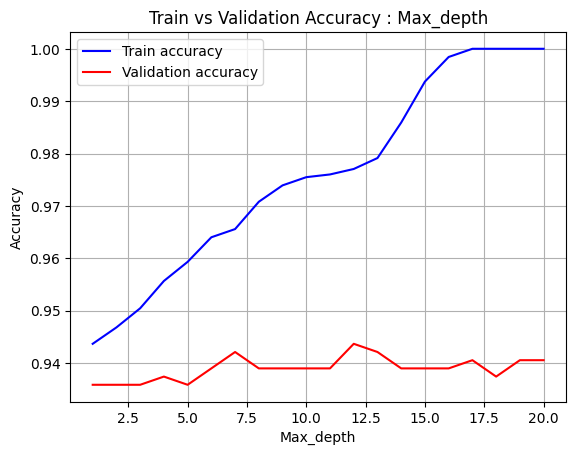

In [74]:
train_acc1 = []
val_acc1 = []

for max_d in range(1,21):
  model = RandomForestClassifier(max_depth=max_d, random_state=42)
  model.fit(X_train, y_train)
  train_acc1.append(model.score(X_train, y_train))
  val_acc1.append(model.score(X_test,y_test))

line1, = plt.plot([*range(1,21)], train_acc1, 'b', label='Train accuracy')
line2, = plt.plot([*range(1,21)], val_acc1, 'r', label='Validation accuracy')

plt.legend()
plt.title('Train vs Validation Accuracy : Max_depth')
plt.ylabel('Accuracy')
plt.xlabel('Max_depth')
plt.grid()
plt.show()

train_acc1.clear()
val_acc1.clear()

# 3.6 Naive Bayes Classifier

In [75]:
from sklearn.naive_bayes import GaussianNB

Fit the Model

In [76]:
model = GaussianNB()

model= model.fit(X_train, y_train)
y_pred3 = model.predict(X_test)

Evaluate possible overfitting

In [77]:
print('Training set score: {:.4f}'.format(model.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(model.score(X_test, y_test)))

Training set score: 0.9218
Test set score: 0.9343


Confusion Matrix

In [78]:
cnf_matrix3 = metrics.confusion_matrix(y_test, y_pred3)
print(cnf_matrix3)

[[532  24]
 [ 18  65]]


Classification Report

In [79]:
target_names = ['Y1=0', 'Y1>0']
print(classification_report(y_test, y_pred3, target_names=target_names))

              precision    recall  f1-score   support

        Y1=0       0.97      0.96      0.96       556
        Y1>0       0.73      0.78      0.76        83

    accuracy                           0.93       639
   macro avg       0.85      0.87      0.86       639
weighted avg       0.94      0.93      0.94       639



Area Under the Curve (AUC)

In [80]:
y_pred_proba4 = model.predict_proba(X_test)[::,1]
auc5 = metrics.roc_auc_score(y_test, y_pred_proba4)
print('Area Under the Curve (AUC): {:.4f}'.format(auc5))

Area Under the Curve (AUC): 0.8534


Precision-Recall Curve

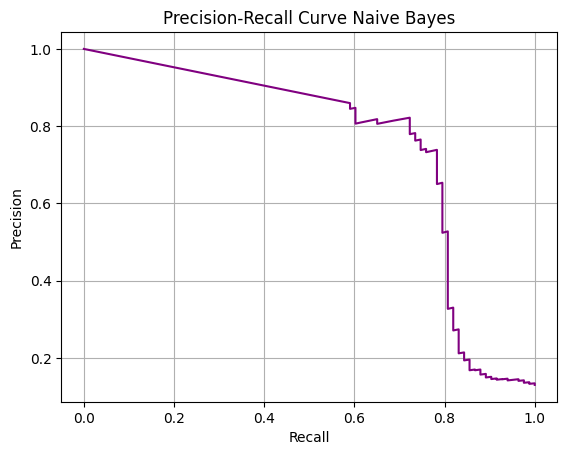

In [81]:
from sklearn.metrics import precision_recall_curve

precision6, recall6, thresholds6 = precision_recall_curve(y_test, y_pred_proba4)

fig, ax = plt.subplots()
ax.plot(recall6, precision6, color='purple')

ax.set_title('Precision-Recall Curve Naive Bayes')
ax.set_ylabel('Precision')
ax.set_xlabel('Recall')

plt.grid()
plt.show()

# 3.7 Confusion Matrices

Text(0.5, 328.48148148148147, 'Predicted label')

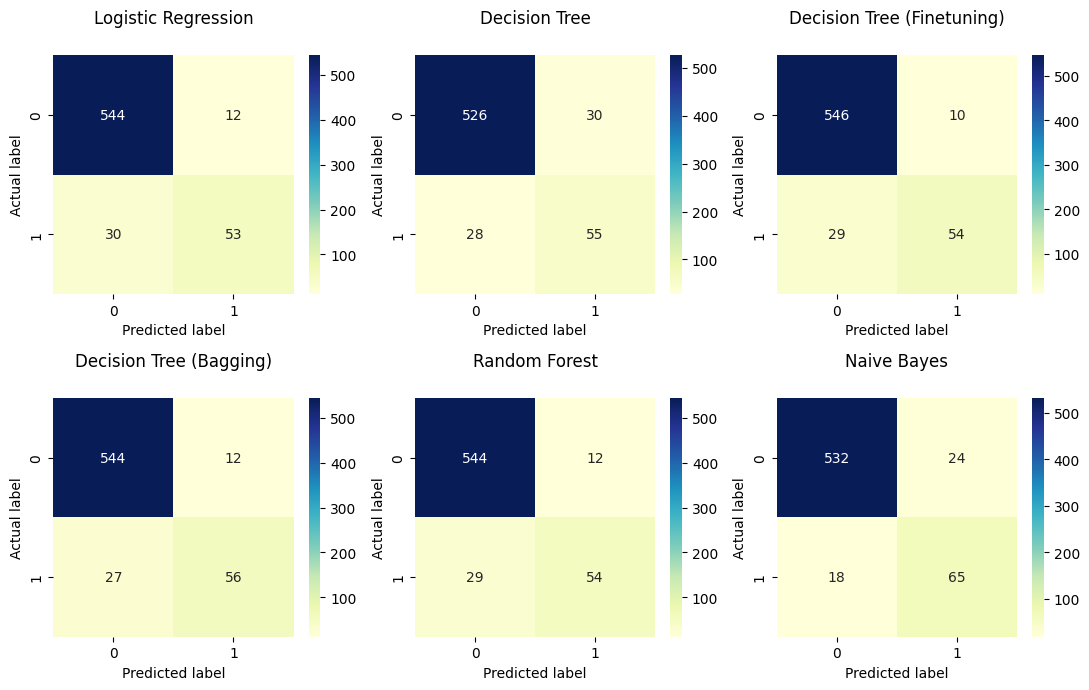

In [136]:
class_names=[0,1] 

plt.figure(figsize=(11,10))

plt.subplot(3, 3, 1)
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Logistic Regression', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

plt.subplot(3, 3, 2)
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

sns.heatmap(pd.DataFrame(cnf_matrix1), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Decision Tree', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

plt.subplot(3, 3, 3)
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

sns.heatmap(pd.DataFrame(cnf_matrix11), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Decision Tree (Finetuning)', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

plt.subplot(3, 3, 4)
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

sns.heatmap(pd.DataFrame(cnf_matrix4), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Decision Tree (Bagging)', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')


plt.subplot(3, 3, 5)
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

sns.heatmap(pd.DataFrame(cnf_matrix2), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Random Forest', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

plt.subplot(3, 3, 6)
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

sns.heatmap(pd.DataFrame(cnf_matrix3), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Naive Bayes', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

# 3.8 Precision-Recall Curves

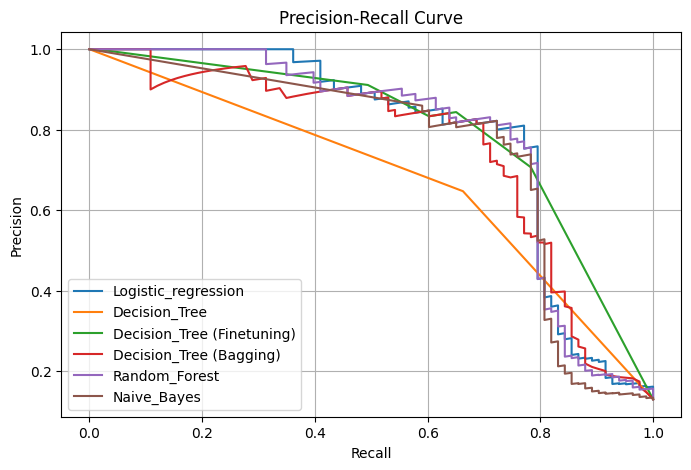

In [83]:
fig, ax = plt.subplots(figsize=(8,5))
ax.plot(recall, precision, label="Logistic_regression")
ax.plot(recall1, precision1, label="Decision_Tree")
ax.plot(recall3, precision3, label="Decision_Tree (Finetuning)")
ax.plot(recall4, precision4, label="Decision_Tree (Bagging)")
ax.plot(recall5, precision5, label="Random_Forest")
ax.plot(recall6, precision6, label="Naive_Bayes")

ax.set_title('Precision-Recall Curve')
ax.set_ylabel('Precision')
ax.set_xlabel('Recall')

plt.grid()
plt.legend()

# 3.9 Adjust Class Weights: Logistic Regression

In [84]:
from sklearn.linear_model import LogisticRegression
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

Fit the Model

In [85]:
logregACW = LogisticRegression(class_weight='balanced', max_iter=1000)
logregACW.fit(X_train, y_train)
y_pred5 = logregACW.predict(X_test)

Evaluate possible overfitting

In [86]:
print('Training set score: {:.4f}'.format(logregACW.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(logregACW.score(X_test, y_test)))

Training set score: 0.9353
Test set score: 0.9437


Confusion Matrix

In [87]:
cnf_matrix5 = metrics.confusion_matrix(y_test, y_pred5)
print(cnf_matrix5)

[[539  17]
 [ 19  64]]


Classification Report

In [88]:
target_names = ['Y1=0', 'Y1>0']
print(classification_report(y_test, y_pred5, target_names=target_names))

              precision    recall  f1-score   support

        Y1=0       0.97      0.97      0.97       556
        Y1>0       0.79      0.77      0.78        83

    accuracy                           0.94       639
   macro avg       0.88      0.87      0.87       639
weighted avg       0.94      0.94      0.94       639



Area Under the Curve (AUC)

In [89]:
y_pred_proba6 = logregACW.predict_proba(X_test)[::,1]
auc6 = metrics.roc_auc_score(y_test, y_pred_proba6)
print('Area Under the Curve (AUC): {:.4f}'.format(auc6))

Area Under the Curve (AUC): 0.9024


# 3.10 Adjust Class Weights: Decision Tree (Finetuning)

In [90]:
from sklearn.tree import DecisionTreeClassifier

Fit the Model

In [91]:
treeACW = DecisionTreeClassifier(criterion="gini", max_depth=3, class_weight='balanced')
treeACW.fit(X_train, y_train)
y_pred6 = treeACW.predict(X_test)

Evaluate possible overfitting

In [92]:
print('Training set score: {:.4f}'.format(treeACW.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(treeACW.score(X_test, y_test)))

Training set score: 0.9264
Test set score: 0.9233


Confusion Matrix

In [93]:
cnf_matrix6 = metrics.confusion_matrix(y_test, y_pred6)
print(cnf_matrix6)

[[526  30]
 [ 19  64]]


Classification Report

In [94]:
target_names = ['Y1=0', 'Y1>0']
print(classification_report(y_test, y_pred6, target_names=target_names))

              precision    recall  f1-score   support

        Y1=0       0.97      0.95      0.96       556
        Y1>0       0.68      0.77      0.72        83

    accuracy                           0.92       639
   macro avg       0.82      0.86      0.84       639
weighted avg       0.93      0.92      0.93       639



Area Under the Curve (AUC)

In [95]:
y_pred_proba7 = treeACW.predict_proba(X_test)[::,1]
auc7 = metrics.roc_auc_score(y_test, y_pred_proba7)
print('Area Under the Curve (AUC): {:.4f}'.format(auc7))

Area Under the Curve (AUC): 0.8453


Feauteres Importance

In [96]:
dfFeatures3 = pd.DataFrame({'Features':feature_names,'Importances':treeACW.feature_importances_})
dfFeatures3.sort_values(by='Importances',ascending=False).head(10)

,Features,Importances
8,r4_MAR,0.923566
3,SST,0.055296
9,r5_MAR,0.011975
2,v10,0.009163
0,t2m,0.000000
1,u10,0.000000
4,SIC,0.000000
5,r1_MAR,0.000000
6,r2_MAR,0.000000
7,r3_MAR,0.000000


# 3.11 Adjust Class Weight: Random Forest

In [97]:
from sklearn.ensemble import RandomForestClassifier

Fit the Model

In [98]:
randforADC = RandomForestClassifier(max_depth=3, random_state=42, bootstrap=True, n_estimators=100, class_weight='balanced')
randforADC.fit(X_train,y_train)
y_pred7 = randforADC.predict(X_test)

Evaluate possible overfitting

In [99]:
print('Training set score: {:.4f}'.format(randforADC.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(randforADC.score(X_test, y_test)))

Training set score: 0.9353
Test set score: 0.9390


Confusion Matrix

In [100]:
cnf_matrix7 = metrics.confusion_matrix(y_test, y_pred7)
print(cnf_matrix7)

[[537  19]
 [ 20  63]]


Classification Report

In [101]:
target_names = ['Y1=0', 'Y1>0']
print(classification_report(y_test, y_pred7, target_names=target_names))

              precision    recall  f1-score   support

        Y1=0       0.96      0.97      0.96       556
        Y1>0       0.77      0.76      0.76        83

    accuracy                           0.94       639
   macro avg       0.87      0.86      0.86       639
weighted avg       0.94      0.94      0.94       639



Area Under the Curve (AUC)

In [102]:
y_pred_proba8 = randforADC.predict_proba(X_test)[::,1]
auc8 = metrics.roc_auc_score(y_test, y_pred_proba8)
print('Area Under the Curve (AUC): {:.4f}'.format(auc8))

Area Under the Curve (AUC): 0.8890


Feauteres Importance

In [103]:
dfFeatures4 = pd.DataFrame({'Features':feature_names,'Importances':randforADC.feature_importances_})
dfFeatures4.sort_values(by='Importances',ascending=False).head(10)

,Features,Importances
8,r4_MAR,0.234237
9,r5_MAR,0.215938
7,r3_MAR,0.153483
5,r1_MAR,0.148712
6,r2_MAR,0.127844
0,t2m,0.066303
3,SST,0.022256
2,v10,0.012952
4,SIC,0.010331
1,u10,0.007945


# 3.12 Compare before and after Confusion Matrix

Text(0.5, 328.48148148148147, 'Predicted label')

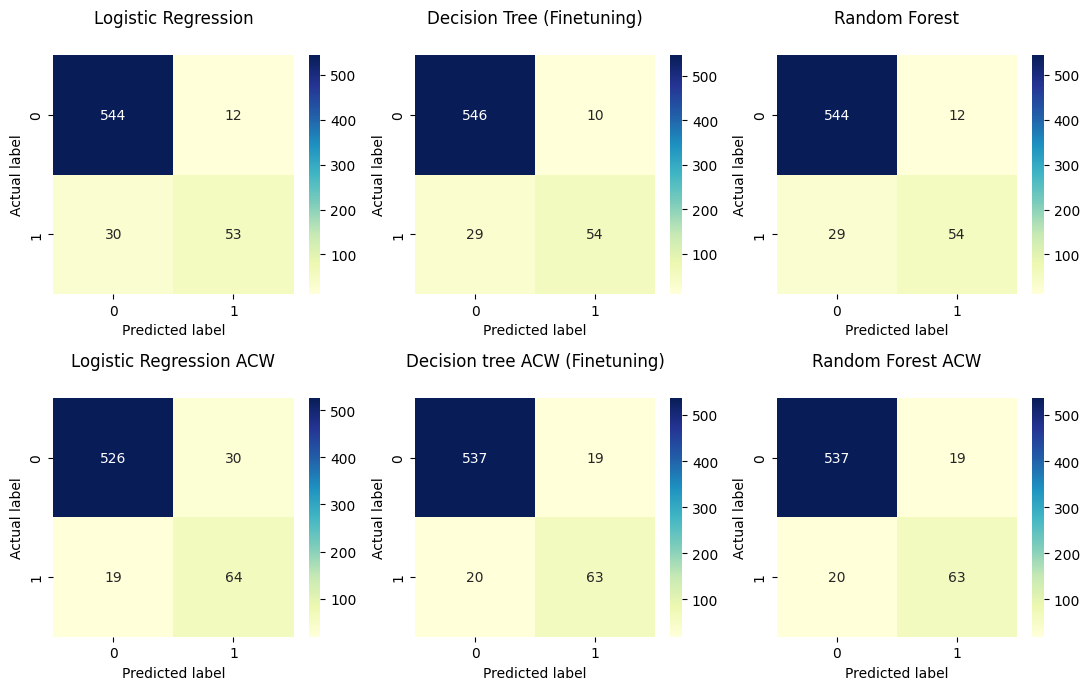

In [104]:
class_names=[0,1] 

plt.figure(figsize=(11,10))

plt.subplot(3, 3, 1)
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Logistic Regression', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

plt.subplot(3, 3, 2)
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

sns.heatmap(pd.DataFrame(cnf_matrix11), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Decision Tree (Finetuning)', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

plt.subplot(3, 3, 3)
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

sns.heatmap(pd.DataFrame(cnf_matrix2), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Random Forest', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

plt.subplot(3, 3, 4)
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

sns.heatmap(pd.DataFrame(cnf_matrix6), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Logistic Regression ACW', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')


plt.subplot(3, 3, 5)
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

sns.heatmap(pd.DataFrame(cnf_matrix7), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Decision tree ACW (Finetuning)', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

plt.subplot(3, 3, 6)
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

sns.heatmap(pd.DataFrame(cnf_matrix7), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Random Forest ACW', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

# 3.13 AdaBoost

In [105]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
from sklearn import metrics

Fit the Model

In [106]:
abc = AdaBoostClassifier(n_estimators=500,learning_rate=1)
ADA = abc.fit(X_train, y_train)
y_pred8 = ADA.predict(X_test)

C:\Users\Utente\AppData\Roaming\Python\Python312\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Evaluate possible overfitting

In [107]:
print('Training set score: {:.4f}'.format(ADA.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(ADA.score(X_test, y_test)))

Training set score: 0.9765
Test set score: 0.9343


Confusion Matrix

In [108]:
cnf_matrix8 = metrics.confusion_matrix(y_test, y_pred8)
print(cnf_matrix8)

[[541  15]
 [ 27  56]]


Classification Report

In [109]:
target_names = ['Y1=0', 'Y1>0']
print(classification_report(y_test, y_pred8, target_names=target_names))

              precision    recall  f1-score   support

        Y1=0       0.95      0.97      0.96       556
        Y1>0       0.79      0.67      0.73        83

    accuracy                           0.93       639
   macro avg       0.87      0.82      0.84       639
weighted avg       0.93      0.93      0.93       639



Area Under the Curve (AUC)

In [110]:
y_pred_proba9 = ADA.predict_proba(X_test)[::,1]
auc9 = metrics.roc_auc_score(y_test, y_pred_proba9)
print('Area Under the Curve (AUC): {:.4f}'.format(auc9))

Area Under the Curve (AUC): 0.8576


Feauteres Importance

In [111]:
dfFeatures5 = pd.DataFrame({'Features':feature_names,'Importances':ADA.feature_importances_})
dfFeatures5.sort_values(by='Importances',ascending=False).head(10)

,Features,Importances
1,u10,0.174
2,v10,0.168
0,t2m,0.150
6,r2_MAR,0.112
4,SIC,0.096
5,r1_MAR,0.076
3,SST,0.072
9,r5_MAR,0.062
8,r4_MAR,0.052
7,r3_MAR,0.038


# 3.14 Stacking

In [112]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import StackingClassifier

In [113]:
estimators = []
estimators.append(('AdaBoostClassifier', AdaBoostClassifier(random_state=13) ))
estimators.append(('Decision Tree Classifier', DecisionTreeClassifier(random_state=13, max_depth=3) ))
estimators.append(('Gaussian NB', GaussianNB() ))
estimators.append(('LogisticRegression', LogisticRegression(max_iter=1000, random_state=13)))
estimators.append(('RandomForest', RandomForestClassifier(max_depth= 3, n_estimators= 200, random_state=13) ))


In [114]:
XGB = XGBClassifier(random_state=13)

Fit the Model

In [115]:
SC = StackingClassifier(estimators=estimators,final_estimator=XGB,cv=6)
SC.fit(X_train, y_train)
y_pred9 = SC.predict(X_test)

C:\Users\Utente\AppData\Roaming\Python\Python312\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\Utente\AppData\Roaming\Python\Python312\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\Utente\AppData\Roaming\Python\Python312\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\Utente\AppData\Roaming\Python\Python312\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. U

Evaluate possible overfitting

In [116]:
print('Training set score: {:.4f}'.format(SC.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(SC.score(X_test, y_test)))

Training set score: 0.9484
Test set score: 0.9358


Confusion Matrix

In [117]:
cnf_matrix9 = metrics.confusion_matrix(y_test, y_pred9)
print(cnf_matrix9)

[[543  13]
 [ 28  55]]


Classification report

In [118]:
target_names = ['Y1=0', 'Y1>0']
print(classification_report(y_test, y_pred9, target_names=target_names))

              precision    recall  f1-score   support

        Y1=0       0.95      0.98      0.96       556
        Y1>0       0.81      0.66      0.73        83

    accuracy                           0.94       639
   macro avg       0.88      0.82      0.85       639
weighted avg       0.93      0.94      0.93       639



Area Under the Curve (AUC)

In [119]:
y_pred_proba10 = ADA.predict_proba(X_test)[::,1]
auc10 = metrics.roc_auc_score(y_test, y_pred_proba10)
print('Area Under the Curve (AUC): {:.4f}'.format(auc10))

Area Under the Curve (AUC): 0.8576


# 4 Conclusion

# 4.1 Accuracy of the Models

In [120]:
from sklearn import model_selection

In [ ]:
random_seed = 1999

outcome = []
model_names = []
models = [('LogReg', LogisticRegression()), 
          ('DecTree', DecisionTreeClassifier()), 
          ('DecTreeFinetuning', DecisionTreeClassifier(criterion="gini", max_depth=3)),
          ('DecTreeBagging', BalancedBaggingClassifier(estimator=treebag,n_estimators=100, sampling_strategy='not majority',replacement=False, random_state=42)),
          ('RandFor', RandomForestClassifier(max_depth=3, random_state=42,  oob_score = True)),
          ('GaussianNB', GaussianNB()),
          ('LogRegBalanced', LogisticRegression(class_weight='balanced')),
          ('DecTreeBalanced',DecisionTreeClassifier(criterion="gini", max_depth=3, class_weight='balanced')),
          ('RandForBalanced', RandomForestClassifier(max_depth=3, random_state=42, bootstrap=True, n_estimators=100, class_weight='balanced')),
          ('AdaBoosting',AdaBoostClassifier(n_estimators=500,learning_rate=1)),
          ('Stacking',StackingClassifier(estimators=estimators,final_estimator=XGB,cv=6))
          ]

for model_name, model in models:
    k_fold_validation = model_selection.KFold(n_splits=5)
    results = model_selection.cross_val_score(model, X_train, y_train, cv=k_fold_validation, scoring='accuracy')
    outcome.append(results)
    model_names.append(model_name)
    output_message = "%s| Mean=%f STD=%f" % (model_name, results.mean(), results.std())
    print(output_message)

C:\Users\Utente\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Utente\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_

LogReg| Mean=0.943141 STD=0.006030
DecTree| Mean=0.908195 STD=0.012007
DecTreeFinetuning| Mean=0.941574 STD=0.006316
DecTreeBagging| Mean=0.944184 STD=0.004236
RandFor| Mean=0.944709 STD=0.006003
GaussianNB| Mean=0.921229 STD=0.009411


C:\Users\Utente\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Utente\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_

LogRegBalanced| Mean=0.934268 STD=0.009700
DecTreeBalanced| Mean=0.920714 STD=0.012919
RandForBalanced| Mean=0.945231 STD=0.004311


C:\Users\Utente\AppData\Roaming\Python\Python312\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\Utente\AppData\Roaming\Python\Python312\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\Utente\AppData\Roaming\Python\Python312\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\Utente\AppData\Roaming\Python\Python312\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. U

AdaBoosting| Mean=0.933231 STD=0.007473


C:\Users\Utente\AppData\Roaming\Python\Python312\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\Utente\AppData\Roaming\Python\Python312\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\Utente\AppData\Roaming\Python\Python312\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\Utente\AppData\Roaming\Python\Python312\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. U

Stacking| Mean=0.936879 STD=0.009266


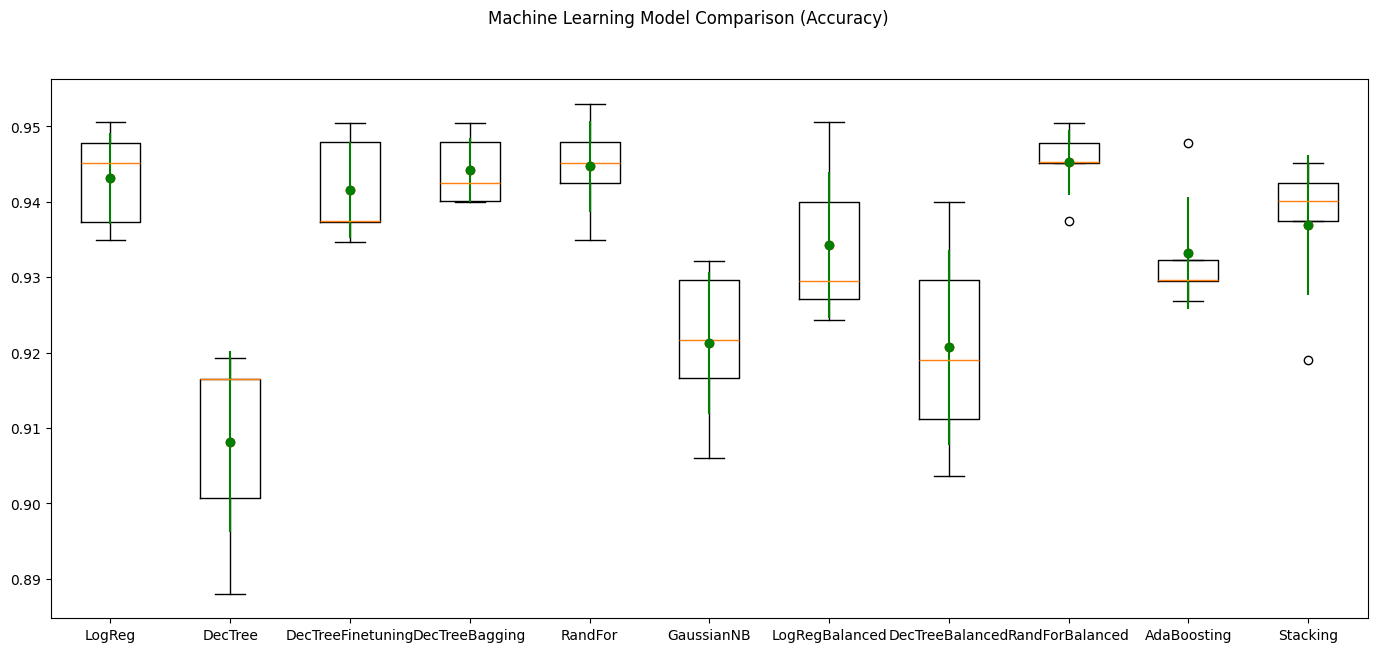

In [129]:
fig = plt.figure(figsize=(17, 7))
fig.suptitle('Machine Learning Model Comparison (Accuracy)')
ax = fig.add_subplot(111)
plt.boxplot(outcome)
ax.set_xticklabels(model_names)

mean = [np.mean(d) for d in outcome]
std_devs = [np.std(d) for d in outcome]

for i in range(len(mean)):
   plt.plot(i + 1, mean[i], 'ro')
for i in range(len(std_devs)):
   plt.errorbar(i + 1, mean[i], yerr=std_devs[i], fmt='o', color='green')

plt.show()

# 4.2 Precision of the models

In [130]:
random_seed = 1999

outcome1 = []
model_names1 = []
models1 = [('LogReg', LogisticRegression()), 
          ('DecTree', DecisionTreeClassifier()), 
          ('DecTreeFinetuning', DecisionTreeClassifier(criterion="gini", max_depth=3)),
          ('DecTreeBagging', BalancedBaggingClassifier(estimator=treebag,n_estimators=100, sampling_strategy='not majority',replacement=False, random_state=42)),
          ('RandFor', RandomForestClassifier(max_depth=3, random_state=42,  oob_score = True)),
          ('GaussianNB', GaussianNB()),
          ('LogRegBalanced', LogisticRegression(class_weight='balanced')),
          ('DecTreeBalanced',DecisionTreeClassifier(criterion="gini", max_depth=3, class_weight='balanced')),
          ('RandForBalanced', RandomForestClassifier(max_depth=3, random_state=42, bootstrap=True, n_estimators=100, class_weight='balanced')),
          ('AdaBoosting',AdaBoostClassifier(n_estimators=500,learning_rate=1)),
          ('Stacking',StackingClassifier(estimators=estimators,final_estimator=XGB,cv=6))
          ]

for model_name1, model1 in models1:
    k_fold_validation1 = model_selection.KFold(n_splits=5)
    results1 = model_selection.cross_val_score(model1, X_train, y_train, cv=k_fold_validation1, scoring='precision')
    outcome1.append(results1)
    model_names1.append(model_name1)
    output_message1 = "%s| Mean=%f STD=%f" % (model_name1, results1.mean(), results1.std())
    print(output_message1)

C:\Users\Utente\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Utente\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_

LogReg| Mean=0.836519 STD=0.041224
DecTree| Mean=0.593787 STD=0.032095
DecTreeFinetuning| Mean=0.807346 STD=0.046262
DecTreeBagging| Mean=0.819228 STD=0.059194
RandFor| Mean=0.825353 STD=0.051039
GaussianNB| Mean=0.626636 STD=0.056050


C:\Users\Utente\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Utente\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_

LogRegBalanced| Mean=0.691914 STD=0.052808
DecTreeBalanced| Mean=0.628184 STD=0.063448
RandForBalanced| Mean=0.664615 STD=0.046411


C:\Users\Utente\AppData\Roaming\Python\Python312\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\Utente\AppData\Roaming\Python\Python312\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\Utente\AppData\Roaming\Python\Python312\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\Utente\AppData\Roaming\Python\Python312\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. U

AdaBoosting| Mean=0.755191 STD=0.072608


C:\Users\Utente\AppData\Roaming\Python\Python312\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\Utente\AppData\Roaming\Python\Python312\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\Utente\AppData\Roaming\Python\Python312\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\Utente\AppData\Roaming\Python\Python312\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. U

Stacking| Mean=0.760431 STD=0.070708


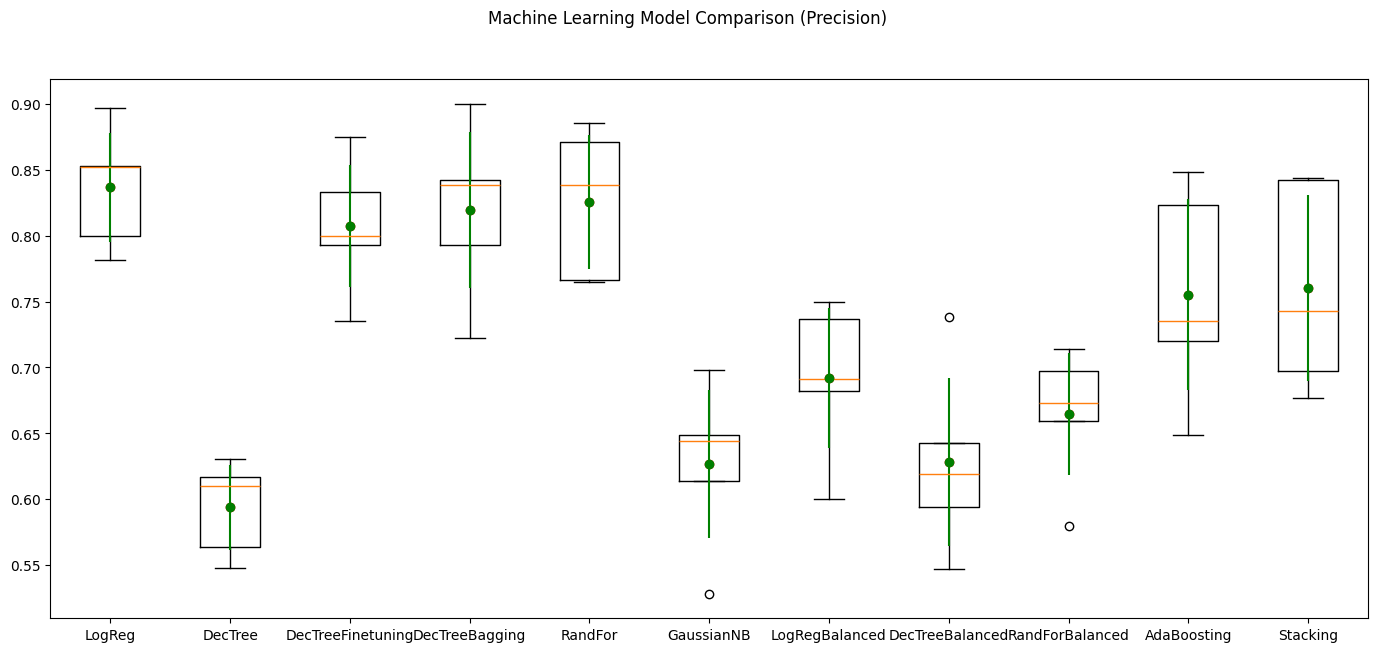

In [131]:
fig = plt.figure(figsize=(17, 7))
fig.suptitle('Machine Learning Model Comparison (Precision)')
ax = fig.add_subplot(111)
plt.boxplot(outcome1)
ax.set_xticklabels(model_names1)

mean = [np.mean(d) for d in outcome1]
std_devs = [np.std(d) for d in outcome1]

for i in range(len(mean)):
   plt.plot(i + 1, mean[i], 'ro')
for i in range(len(std_devs)):
   plt.errorbar(i + 1, mean[i], yerr=std_devs[i], fmt='o', color='green')

plt.show()

# 4.3 Recall of the Models

In [132]:
random_seed = 1999

outcome2 = []
model_names2 = []
models2 = [('LogReg', LogisticRegression()), 
          ('DecTree', DecisionTreeClassifier()), 
          ('DecTreeFinetuning', DecisionTreeClassifier(criterion="gini", max_depth=3)),
          ('DecTreeBagging', BalancedBaggingClassifier(estimator=treebag,n_estimators=100, sampling_strategy='not majority',replacement=False, random_state=42)),
          ('RandFor', RandomForestClassifier(max_depth=3, random_state=42,  oob_score = True)),
          ('GaussianNB', GaussianNB()),
          ('LogRegBalanced', LogisticRegression(class_weight='balanced')),
          ('DecTreeBalanced',DecisionTreeClassifier(criterion="gini", max_depth=3, class_weight='balanced')),
          ('RandForBalanced', RandomForestClassifier(max_depth=3, random_state=42, bootstrap=True, n_estimators=100, class_weight='balanced')),
          ('AdaBoosting',AdaBoostClassifier(n_estimators=500,learning_rate=1)),
          ('Stacking',StackingClassifier(estimators=estimators,final_estimator=XGB,cv=6))
          ]
for model_name2, model2 in models2:
    k_fold_validation2 = model_selection.KFold(n_splits=5)
    results2 = model_selection.cross_val_score(model2, X_train, y_train, cv=k_fold_validation2, scoring='recall')
    outcome2.append(results2)
    model_names2.append(model_name2)
    output_message2 = "%s| Mean=%f STD=%f" % (model_name2, results2.mean(), results2.std())
    print(output_message2)

C:\Users\Utente\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Utente\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_

LogReg| Mean=0.604209 STD=0.040718
DecTree| Mean=0.604409 STD=0.049627
DecTreeFinetuning| Mean=0.616839 STD=0.032412
DecTreeBagging| Mean=0.634782 STD=0.022267
RandFor| Mean=0.630700 STD=0.020328
GaussianNB| Mean=0.714975 STD=0.027499


C:\Users\Utente\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Utente\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_

LogRegBalanced| Mean=0.739369 STD=0.034575
DecTreeBalanced| Mean=0.714128 STD=0.049491
RandForBalanced| Mean=0.698481 STD=0.048431


C:\Users\Utente\AppData\Roaming\Python\Python312\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\Utente\AppData\Roaming\Python\Python312\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\Utente\AppData\Roaming\Python\Python312\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\Utente\AppData\Roaming\Python\Python312\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. U

AdaBoosting| Mean=0.581172 STD=0.055008


C:\Users\Utente\AppData\Roaming\Python\Python312\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\Utente\AppData\Roaming\Python\Python312\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\Utente\AppData\Roaming\Python\Python312\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\Utente\AppData\Roaming\Python\Python312\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. U

Stacking| Mean=0.620828 STD=0.045994


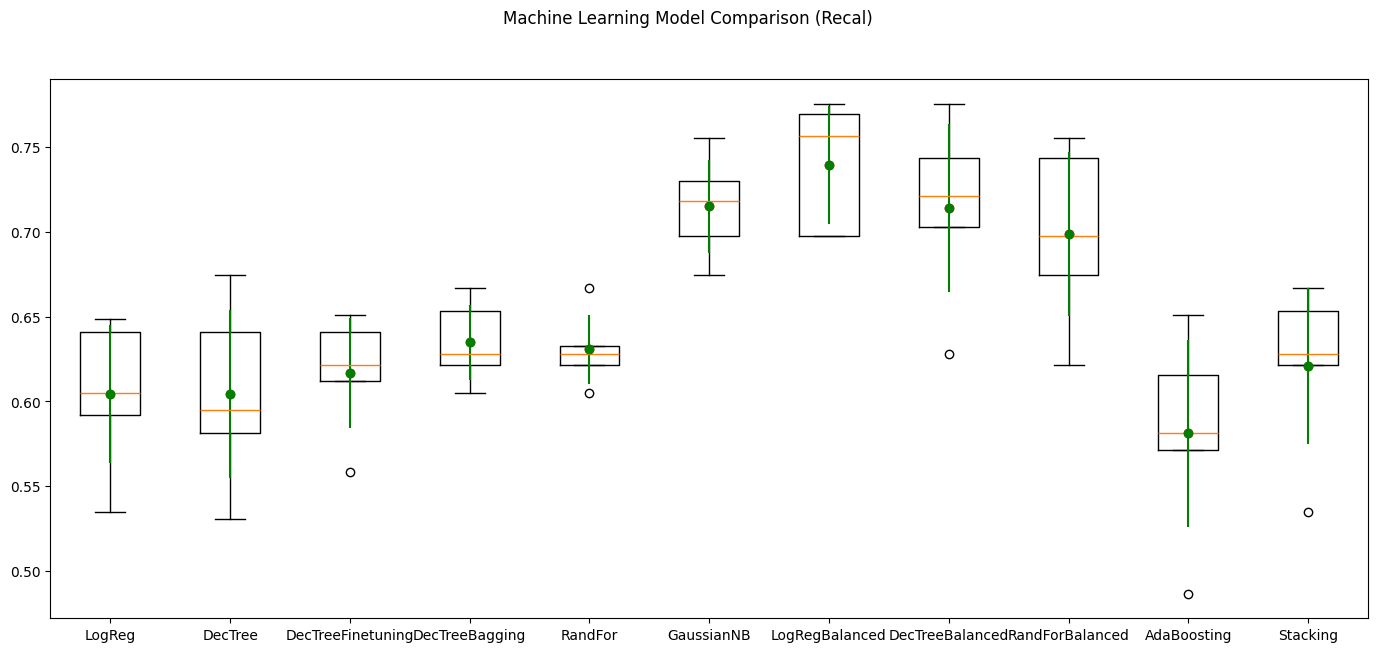

In [133]:
fig = plt.figure(figsize=(17, 7))
fig.suptitle('Machine Learning Model Comparison (Recal)')
ax = fig.add_subplot(111)
plt.boxplot(outcome2)
ax.set_xticklabels(model_names2)

mean = [np.mean(d) for d in outcome2]
std_devs = [np.std(d) for d in outcome2]

for i in range(len(mean)):
   plt.plot(i + 1, mean[i], 'ro')
for i in range(len(std_devs)):
   plt.errorbar(i + 1, mean[i], yerr=std_devs[i], fmt='o', color='green')

plt.show()

# 4.4 F1 of the Models

In [134]:
random_seed = 1999

outcome3 = []
model_names3 = []
models3 = [('LogReg', LogisticRegression()), 
          ('DecTree', DecisionTreeClassifier()), 
          ('DecTreeFinetuning', DecisionTreeClassifier(criterion="gini", max_depth=3)),
          ('DecTreeBagging', BalancedBaggingClassifier(estimator=treebag,n_estimators=100, sampling_strategy='not majority',replacement=False, random_state=42)),
          ('RandFor', RandomForestClassifier(max_depth=3, random_state=42,  oob_score = True)),
          ('GaussianNB', GaussianNB()),
          ('LogRegBalanced', LogisticRegression(class_weight='balanced')),
          ('DecTreeBalanced',DecisionTreeClassifier(criterion="gini", max_depth=3, class_weight='balanced')),
          ('RandForBalanced', RandomForestClassifier(max_depth=3, random_state=42, bootstrap=True, n_estimators=100, class_weight='balanced')),
          ('AdaBoosting',AdaBoostClassifier(n_estimators=500,learning_rate=1)),
          ('Stacking',StackingClassifier(estimators=estimators,final_estimator=XGB,cv=6))
          ]

for model_name3, model3 in models3:
    k_fold_validation3 = model_selection.KFold(n_splits=5)
    results3 = model_selection.cross_val_score(model3, X_train, y_train, cv=k_fold_validation3, scoring='f1')
    outcome3.append(results3)
    model_names3.append(model_name3)
    output_message3 = "%s| Mean=%f STD=%f" % (model_name3, results3.mean(), results3.std())
    print(output_message3)

C:\Users\Utente\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Utente\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_

LogReg| Mean=0.699761 STD=0.022887
DecTree| Mean=0.586220 STD=0.035334
DecTreeFinetuning| Mean=0.696546 STD=0.030189
DecTreeBagging| Mean=0.713673 STD=0.019870
RandFor| Mean=0.713885 STD=0.018498
GaussianNB| Mean=0.666048 STD=0.032761


C:\Users\Utente\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Utente\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_

LogRegBalanced| Mean=0.712828 STD=0.026835
DecTreeBalanced| Mean=0.665187 STD=0.035578
RandForBalanced| Mean=0.678583 STD=0.025126


C:\Users\Utente\AppData\Roaming\Python\Python312\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\Utente\AppData\Roaming\Python\Python312\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\Utente\AppData\Roaming\Python\Python312\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\Utente\AppData\Roaming\Python\Python312\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. U

AdaBoosting| Mean=0.654623 STD=0.051370


C:\Users\Utente\AppData\Roaming\Python\Python312\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\Utente\AppData\Roaming\Python\Python312\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\Utente\AppData\Roaming\Python\Python312\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\Utente\AppData\Roaming\Python\Python312\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. U

Stacking| Mean=0.682576 STD=0.050044


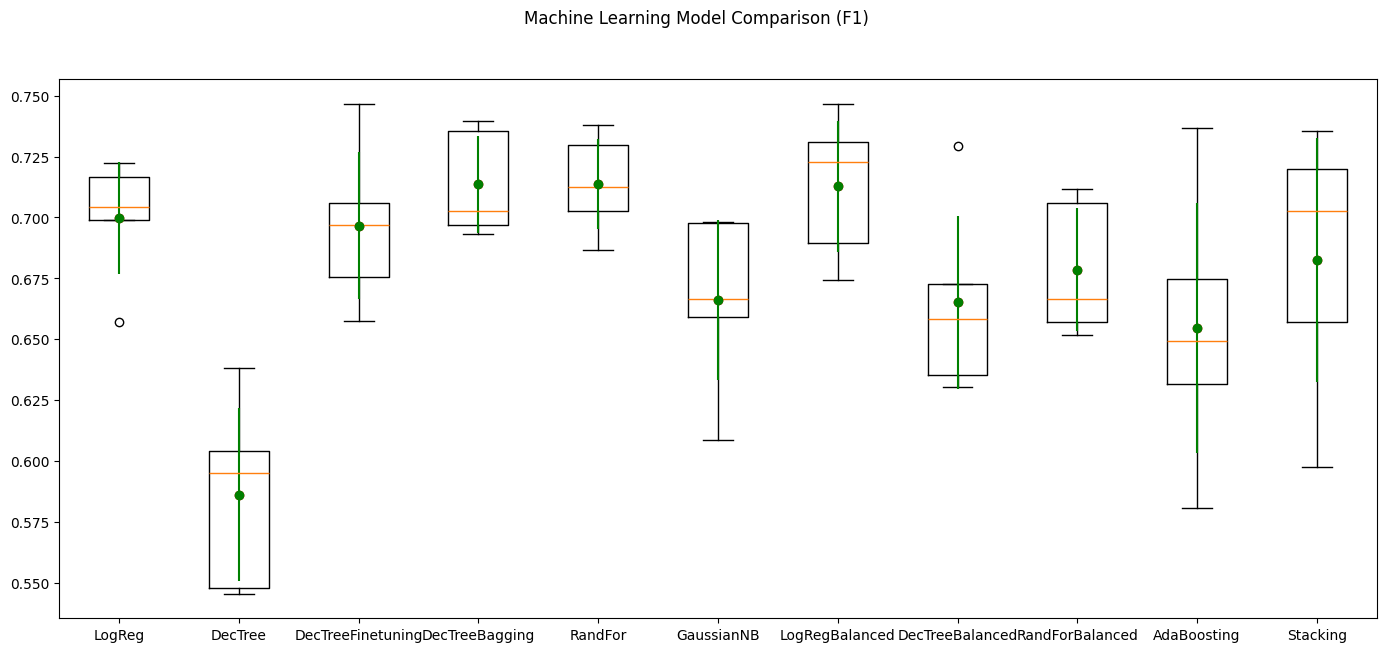

In [135]:
fig = plt.figure(figsize=(17, 7))
fig.suptitle('Machine Learning Model Comparison (F1)')
ax = fig.add_subplot(111)
plt.boxplot(outcome3)
ax.set_xticklabels(model_names3)

mean = [np.mean(d) for d in outcome3]
std_devs = [np.std(d) for d in outcome3]

for i in range(len(mean)):
   plt.plot(i + 1, mean[i], 'ro')
for i in range(len(std_devs)):
   plt.errorbar(i + 1, mean[i], yerr=std_devs[i], fmt='o', color='green')

plt.show()